In [2]:
import xarray as xr
import netCDF4 as nc
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cmocean.cm as cm
import datetime as dt
import matplotlib.patches as mpatches
from matplotlib.colors import LogNorm
import pickle 
import os
from salishsea_tools import viz_tools, geo_tools
import arrow
import copy
import math
import matplotlib.dates as mdates
#import NorthNut as nn
from salishsea_tools import visualisations as vis
from salishsea_tools import viz_tools
from pathlib import Path

In [3]:
# Constant and data rang
kk, jj, ii = 27, 353, 209 # Patricia bay 
kks, jjs, iis = 35, 423, 266 # SoG Central node
kkt, jjt, iit = 22, 72, 123 # Twanoh
syear = 2018
eyear = 2018
smonth = 1
emonth = 4
startdate = arrow.get(syear, smonth, 1)
enddate = arrow.get(eyear, emonth, 30)


In [7]:
df_chem30 = xr.open_mfdataset('/ocean/atall/MOAD/Model/runs/salishsea_oxy/2018/jan_dec18/zz_o2_nitr/ref30/SalishSea_1d_20180101_20181231_chem_T.nc')
df_diag30 = xr.open_mfdataset('/ocean/atall/MOAD/Model/runs/salishsea_oxy/2018/jan_dec18/zz_o2_nitr/ref30/SalishSea_1d_20180101_20181231_diag_T.nc')
df_biol30 = xr.open_mfdataset('/ocean/atall/MOAD/Model/runs/salishsea_oxy/2018/jan_dec18/zz_o2_nitr/ref30/SalishSea_1d_20180101_20181231_biol_T.nc')
df_grdT30 = xr.open_mfdataset('/ocean/atall/MOAD/Model/runs/salishsea_oxy/2018/jan_dec18/zz_o2_nitr/ref30/SalishSea_1d_20180101_20181231_grid_T.nc')
#df_grdW30 = xr.open_mfdataset('/ocean/atall/MOAD/Model/runs/salishsea_oxy/2018/jan_dec18/zz_o2_nitr/ref30/SalishSea_1d_20180101_20181231_grid_W.nc')

df_chem90 = xr.open_mfdataset('/ocean/atall/MOAD/Model/runs/salishsea_oxy/2018/jan_dec18/zz_o2_nitr/ref90/SalishSea_1d_20180101_20181231_chem_T.nc')
df_diag90 = xr.open_mfdataset('/ocean/atall/MOAD/Model/runs/salishsea_oxy/2018/jan_dec18/zz_o2_nitr/ref90/SalishSea_1d_20180101_20181231_diag_T.nc')
df_biol90 = xr.open_mfdataset('/ocean/atall/MOAD/Model/runs/salishsea_oxy/2018/jan_dec18/zz_o2_nitr/ref90/SalishSea_1d_20180101_20181231_biol_T.nc')
df_grdT90 = xr.open_mfdataset('/ocean/atall/MOAD/Model/runs/salishsea_oxy/2018/jan_dec18/zz_o2_nitr/ref90/SalishSea_1d_20180101_20181231_grid_T.nc')
#df_grdW90 = xr.open_mfdataset('/ocean/atall/MOAD/Model/runs/salishsea_oxy/2018/jan_dec18/zz_o2_nitr/ref90/SalishSea_1d_20180101_20181231_grid_W.nc')

#df_chem = xr.open_mfdataset('/ocean/atall/MOAD/Model/runs/salishsea_oxy/2018/jan_dec18/Ref80PSR0001/SalishSea_1d_20180101_20181231_chem_T.nc')
#df_diag = xr.open_mfdataset('/ocean/atall/MOAD/Model/runs/salishsea_oxy/2018/jan_dec18/Ref80PSR0001/SalishSea_1d_20180101_20181231_diag_T.nc')
#df_biol = xr.open_mfdataset('/ocean/atall/MOAD/Model/runs/salishsea_oxy/2018/jan_dec18/Ref80PSR0001/SalishSea_1d_20180101_20181231_biol_T.nc')
#df_biol90 = xr.open_mfdataset('/ocean/atall/MOAD/Model/runs/salishsea_oxy/long_run/oxygen_PONref90/SalishSea_1d_*biol_T.nc')
#df_chem90 = xr.open_mfdataset('/ocean/atall/MOAD/Model/runs/salishsea_oxy/long_run/oxygen_PONref90/SalishSea_1d_*chem_T.nc')
#df_grdT90 = xr.open_mfdataset('/ocean/atall/MOAD/Model/runs/salishsea_oxy/long_run/oxygen_PONref90/SalishSea_1d_*grid_T.nc')
#df_diag90 = xr.open_mfdataset('/ocean/atall/MOAD/Model/runs/salishsea_oxy/long_run/oxygen_PONref90/SalishSea_1d_*diag_T.nc')
df_chem90

<xarray.Dataset>
Dimensions:                     (y: 898, x: 398, nvertex: 4, deptht: 40,
                                 axis_nbounds: 2, time_counter: 28)
Coordinates:
    nav_lat                     (y, x) float32 dask.array<chunksize=(898, 398), meta=np.ndarray>
    nav_lon                     (y, x) float32 dask.array<chunksize=(898, 398), meta=np.ndarray>
  * deptht                      (deptht) float32 0.5 1.5 2.5 ... 414.5 441.5
    time_centered               (time_counter) datetime64[ns] dask.array<chunksize=(28,), meta=np.ndarray>
  * time_counter                (time_counter) datetime64[ns] 2018-01-01T12:0...
Dimensions without coordinates: y, x, nvertex, axis_nbounds
Data variables:
    bounds_nav_lon              (y, x, nvertex) float32 dask.array<chunksize=(898, 398, 4), meta=np.ndarray>
    bounds_nav_lat              (y, x, nvertex) float32 dask.array<chunksize=(898, 398, 4), meta=np.ndarray>
    area                        (y, x) float32 dask.array<chunksize=(898, 398), meta=np.ndarray>
    deptht_bounds               (deptht, axis_nbounds) float32 dask.array<chunksize=(40, 2), meta=np.ndarray>
    time_centered_bounds        (time_counter, axis_nbounds) datetime64[ns] dask.array<chunksize=(28, 2), meta=np.ndarray>
    time_counter_bounds         (time_counter, axis_nbounds) datetime64[ns] dask.array<chunksize=(28, 2), meta=np.ndarray>
    dissolved_oxygen            (time_counter, deptht, y, x) float32 dask.array<chunksize=(28, 40, 898, 398), meta=np.ndarray>
    dissolved_inorganic_carbon  (time_counter, deptht, y, x) float32 dask.array<chunksize=(28, 40, 898, 398), meta=np.ndarray>
    total_alkalinity            (time_counter, deptht, y, x) float32 dask.array<chunksize=(28, 40, 898, 398), meta=np.ndarray>
Attributes:
    name:         SalishSea_1d_20180101_20181231_chem_T
    description:  chemistry and light
    title:        chemistry and light
    Conventions:  CF-1.6
    timeStamp:    2024-Jul-01 07:24:01 GMT
    uuid:         663f5230-1d90-4c71-a8ff-9bf5272f6a67

In [4]:
oxydif= df_chem90.dissolved_oxygen[:,:kk,jj,ii]- df_chem30.dissolved_oxygen[:,:kk,jj,ii]
pondif= df_biol90.particulate_organic_nitrogen[:,:kk,jj,ii]- df_biol30.particulate_organic_nitrogen[:,:kk,jj,ii]
dondif= df_biol90.dissolved_organic_nitrogen[:,:kk,jj,ii]- df_biol30.dissolved_organic_nitrogen[:,:kk,jj,ii]
oxydifs= df_chem90.dissolved_oxygen[:,:kks,jjs,iis]- df_chem30.dissolved_oxygen[:,:kks,jjs,iis]
pondifs= df_biol90.particulate_organic_nitrogen[:,:kks,jjs,iis]- df_biol30.particulate_organic_nitrogen[:,:kks,jjs,iis]
dondifs= df_biol90.dissolved_organic_nitrogen[:,:kks,jjs,iis]- df_biol30.dissolved_organic_nitrogen[:,:kks,jjs,iis]

nitdif= df_diag90.NITR[:,:kk,jj,ii]- df_diag30.NITR[:,:kk,jj,ii]
remdif= df_diag90.RMIN[:,:kk,jj,ii]- df_diag30.RMIN[:,:kk,jj,ii]
mesdif= df_diag90.RMES[:,:kk,jj,ii]- df_diag30.RMES[:,:kk,jj,ii]
micdif= df_diag90.RMIC[:,:kk,jj,ii]- df_diag30.RMIC[:,:kk,jj,ii]
nppdif= df_diag90.NPP[:,:kk,jj,ii]- df_diag30.NPP[:,:kk,jj,ii]
rppdif= df_diag90.RPP[:,:kk,jj,ii]- df_diag30.RPP[:,:kk,jj,ii]
nitdifs= df_diag90.NITR[:,:kks,jjs,iis]- df_diag30.NITR[:,:kks,jjs,iis]
remdifs= df_diag90.RMIN[:,:kks,jjs,iis]- df_diag30.RMIN[:,:kks,jjs,iis]
mesdifs= df_diag90.RMES[:,:kks,jjs,iis]- df_diag30.RMES[:,:kks,jjs,iis]
micdifs= df_diag90.RMIC[:,:kks,jjs,iis]- df_diag30.RMIC[:,:kks,jjs,iis]
nppdifs= df_diag90.NPP[:,:kks,jjs,iis]- df_diag30.NPP[:,:kks,jjs,iis]
rppdifs= df_diag90.RPP[:,:kks,jjs,iis]- df_diag30.RPP[:,:kks,jjs,iis]
nitdift= df_diag90.NITR[:,:kkt,jjt,iit]- df_diag30.NITR[:,:kkt,jjt,iit]
remdift= df_diag90.RMIN[:,:kkt,jjt,iit]- df_diag30.RMIN[:,:kkt,jjt,iit]
mesdift= df_diag90.RMES[:,:kkt,jjt,iit]- df_diag30.RMES[:,:kkt,jjt,iit]
micdift= df_diag90.RMIC[:,:kkt,jjt,iit]- df_diag30.RMIC[:,:kkt,jjt,iit]
nppdift= df_diag90.NPP[:,:kkt,jjt,iit]- df_diag30.NPP[:,:kkt,jjt,iit]
rppdift= df_diag90.RPP[:,:kkt,jjt,iit]- df_diag30.RPP[:,:kkt,jjt,iit]

In [10]:
#Obs
obs_dir = Path("/ocean/atall/MOAD/Obs/PugetSound/ERDDAP/")
#obs_file_TW = obs_dir / "orca1_L2_gridded_025_a040_31d5_0826_U1719625934355.nc"
obs_file_TW = obs_dir / "orca1_L2_gridded_025_2018.nc"
obs_TW = xr.open_dataset(obs_file_TW)
oxy_TW = obs_TW.mass_concentration_of_oxygen_in_sea_water.sel() * 44.664
obs_TW

<xarray.Dataset>
Dimensions:                                           (cast_start_time: 571,
                                                       sea_water_pressure: 141)
Coordinates:
  * cast_start_time                                   (cast_start_time) datetime64[ns] ...
  * sea_water_pressure                                (sea_water_pressure) float64 ...
Data variables:
    sea_water_temperature                             (cast_start_time, sea_water_pressure) float64 ...
    sea_water_practical_salinity                      (cast_start_time, sea_water_pressure) float64 ...
    sea_water_sigma_theta                             (cast_start_time, sea_water_pressure) float64 ...
    mass_concentration_of_chlorophyll_a_in_sea_water  (cast_start_time, sea_water_pressure) float64 ...
    mole_concentration_of_nitrate_in_sea_water        (cast_start_time, sea_water_pressure) float64 ...
    mass_concentration_of_oxygen_in_sea_water         (cast_start_time, sea_water_pressure) float64 ...
Attributes: (12/59)
    author:                        Seth Travis
    buoy_designation:              ORCA1
    buoy_latitude:                 47.375 degrees N
    buoy_longitude:                -123.00833333 degrees E
    buoy_name:                     Twanoh
    buoy_reference_number:         1
    ...                            ...
    sourceUrl:                     (local files)
    standard_name_vocabulary:      CF Standard Name Table v70
    summary:                       The Northwest Environmental Moorings progr...
    title:                         ORCA1 - Twanoh - L2 Pressure Gridded Data ...
    water_depth:                   35 meters
    wmo_platform_code:             46123

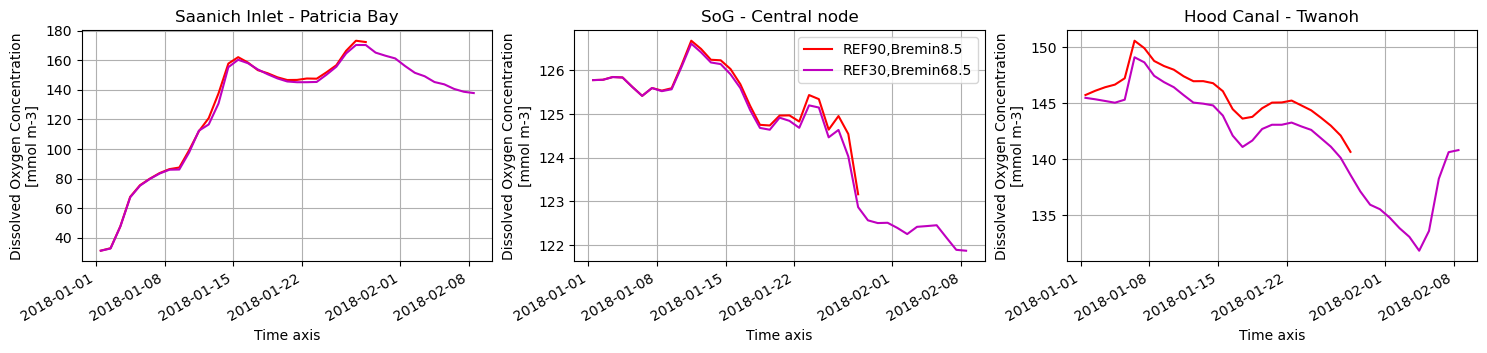

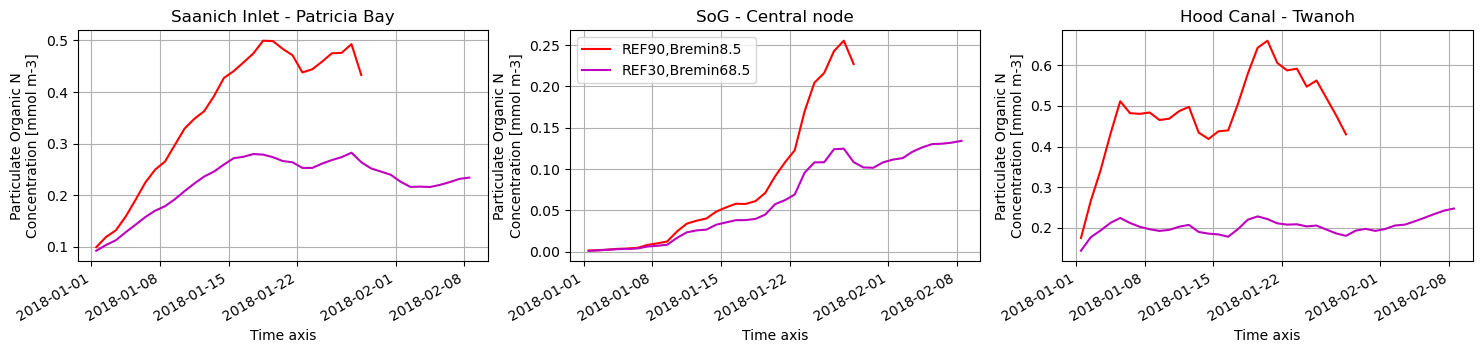

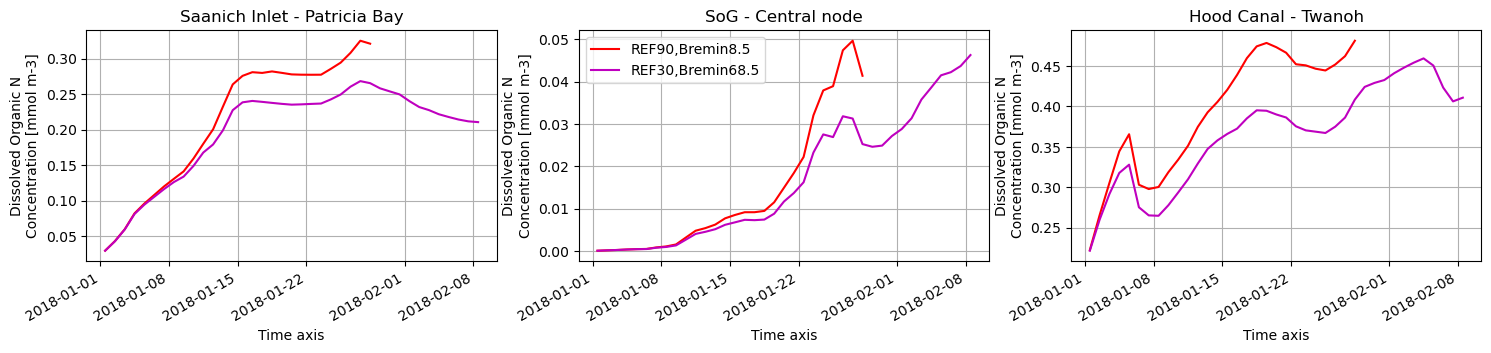

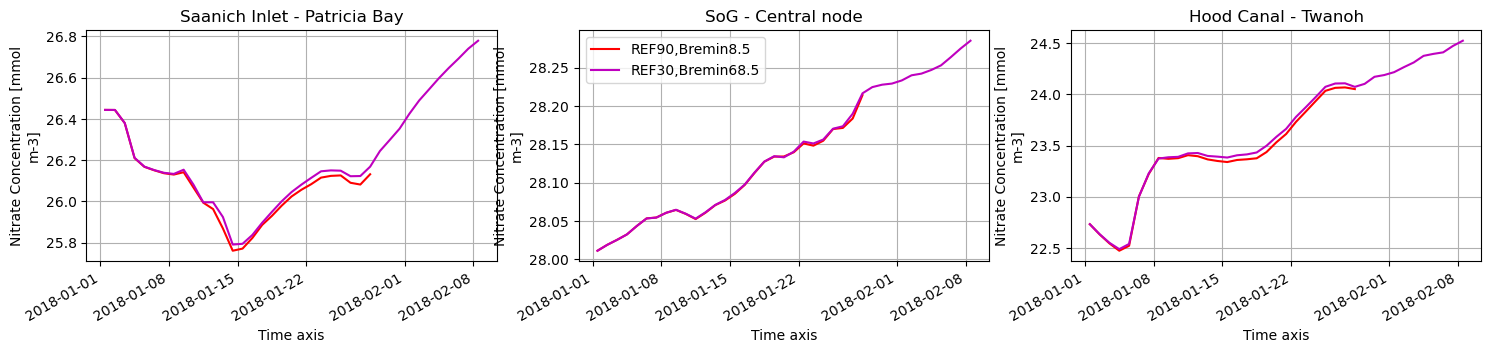

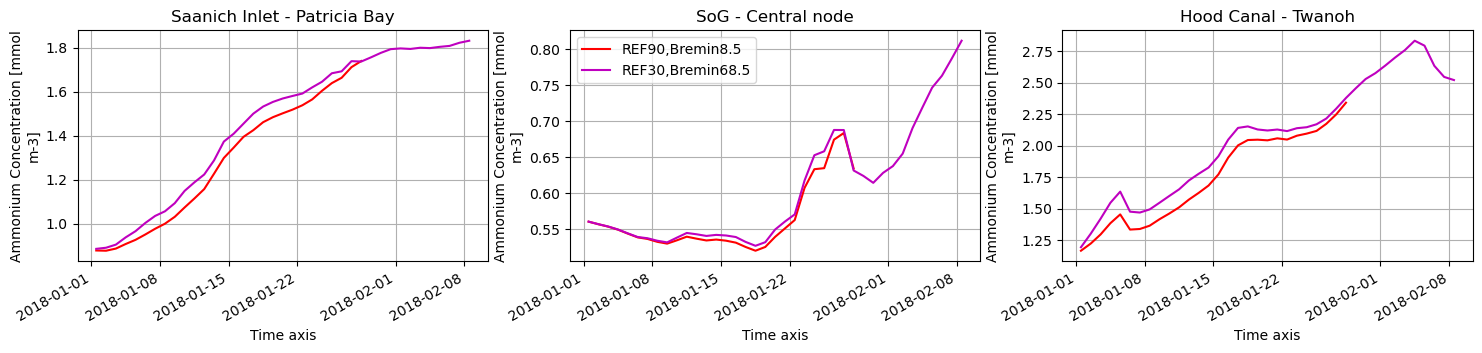

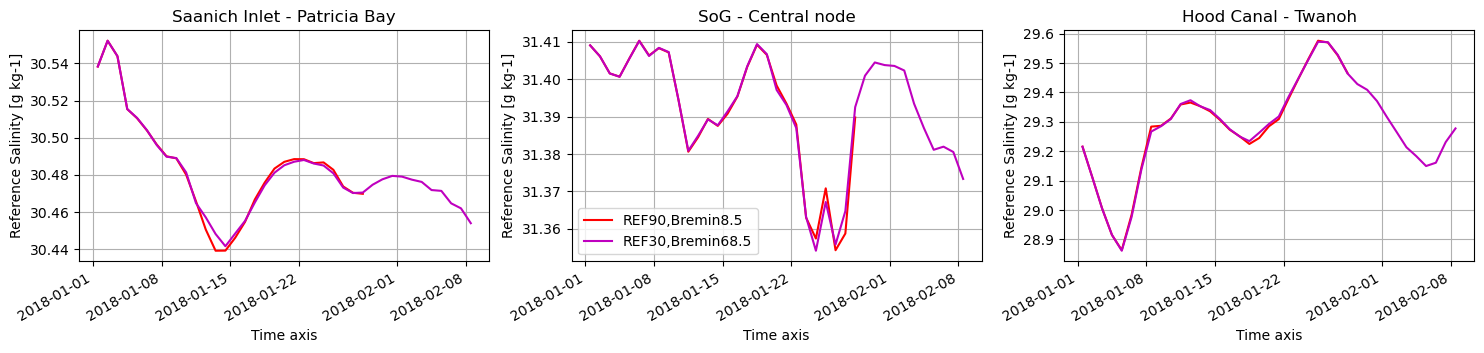

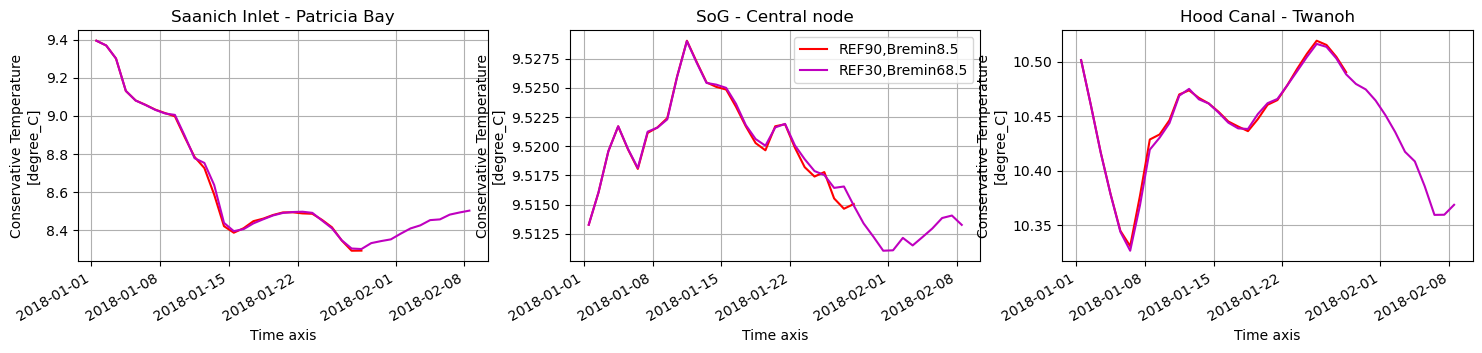

In [8]:
from pathlib import Path
grid_dir = Path("/ocean/atall/MOAD/grid/")
grid_map = Path("grid_from_lat_lon_mask999.nc")
grid_lons_lats = xr.open_dataset(grid_dir / grid_map)
meshmask = xr.open_dataset('/ocean/atall/MOAD/grid/mesh_mask_202310b.nc')
tmask = meshmask.tmask
mbathy = meshmask.mbathy

fig, ax = plt.subplots(1, 3, figsize=(18, 3))
df_chem90['dissolved_oxygen'][:, mbathy[0, jj, ii]-1, jj, ii].where(tmask[0, mbathy[0, jj, ii]-1, jj, ii] == 1).plot(ax=ax[0], x="time_counter", color='r',label='REF90,Bremin8.5')
df_chem30['dissolved_oxygen'][:, mbathy[0, jj, ii]-1, jj, ii].where(tmask[0, mbathy[0, jj, ii]-1, jj, ii] == 1).plot(ax=ax[0], x="time_counter", color='m',label='REF30,Bremin68.5')
df_chem90['dissolved_oxygen'][:, mbathy[0, jjs, iis]-1, jjs, iis].where(tmask[0, mbathy[0, jjs, iis]-1, jjs, iis] == 1).plot(ax=ax[1], x="time_counter", color='r',label='REF90,Bremin8.5')
df_chem30['dissolved_oxygen'][:, mbathy[0, jjs, iis]-1, jjs, iis].where(tmask[0, mbathy[0, jjs, iis]-1, jjs, iis] == 1).plot(ax=ax[1], x="time_counter", color='m',label='REF30,Bremin68.5')
df_chem90['dissolved_oxygen'][:, mbathy[0, jjt, iit]-1, jjt, iit].where(tmask[0, mbathy[0, jjt, iit]-1, jjt, iit] == 1).plot(ax=ax[2], x="time_counter", color='r',label='REF90,Bremin8.5')
df_chem30['dissolved_oxygen'][:, mbathy[0, jjt, iit]-1, jjt, iit].where(tmask[0, mbathy[0, jjt, iit]-1, jjt, iit] == 1).plot(ax=ax[2], x="time_counter", color='m',label='REF30,Bremin68.5')
#oxy_TW[:,118].plot(ax=ax[2], x="cast_start_time", color='k',linestyle='dotted',xlim=(startdate, enddate));
ax[0].set_title('Saanich Inlet - Patricia Bay')
ax[1].set_title('SoG - Central node')
ax[2].set_title('Hood Canal - Twanoh')
ax[0].grid()
ax[1].grid()
ax[2].grid()
ax[1].legend()
fig, ax = plt.subplots(1, 3, figsize=(18, 3))
df_biol90['particulate_organic_nitrogen'][:, mbathy[0, jj, ii]-1, jj, ii].where(tmask[0, mbathy[0, jj, ii]-1, jj, ii] == 1).plot(ax=ax[0], x="time_counter", color='r',label='REF90,Bremin8.5')
df_biol30['particulate_organic_nitrogen'][:, mbathy[0, jj, ii]-1, jj, ii].where(tmask[0, mbathy[0, jj, ii]-1, jj, ii] == 1).plot(ax=ax[0], x="time_counter", color='m',label='REF30,Bremin68.5')
df_biol90['particulate_organic_nitrogen'][:, mbathy[0, jjs, iis]-1, jjs, iis].where(tmask[0, mbathy[0, jjs, iis]-1, jjs, iis] == 1).plot(ax=ax[1], x="time_counter", color='r',label='REF90,Bremin8.5')
df_biol30['particulate_organic_nitrogen'][:, mbathy[0, jjs, iis]-1, jjs, iis].where(tmask[0, mbathy[0, jjs, iis]-1, jjs, iis] == 1).plot(ax=ax[1], x="time_counter", color='m',label='REF30,Bremin68.5')
df_biol90['particulate_organic_nitrogen'][:, mbathy[0, jjt, iit]-1, jjt, iit].where(tmask[0, mbathy[0, jjt, iit]-1, jjt, iit] == 1).plot(ax=ax[2], x="time_counter", color='r',label='REF90,Bremin8.5')
df_biol30['particulate_organic_nitrogen'][:, mbathy[0, jjt, iit]-1, jjt, iit].where(tmask[0, mbathy[0, jjt, iit]-1, jjt, iit] == 1).plot(ax=ax[2], x="time_counter", color='m',label='REF30,Bremin68.5')
#oxy_TW[:,118].plot(ax=ax[2], x="cast_start_time", color='k',linestyle='dotted',xlim=(startdate, enddate));
ax[0].set_title('Saanich Inlet - Patricia Bay')
ax[1].set_title('SoG - Central node')
ax[2].set_title('Hood Canal - Twanoh')
ax[0].grid()
ax[1].grid()
ax[2].grid()
ax[1].legend()
fig, ax = plt.subplots(1, 3, figsize=(18, 3))
df_biol90['dissolved_organic_nitrogen'][:, mbathy[0, jj, ii]-1, jj, ii].where(tmask[0, mbathy[0, jj, ii]-1, jj, ii] == 1).plot(ax=ax[0], x="time_counter", color='r',label='REF90,Bremin8.5')
df_biol30['dissolved_organic_nitrogen'][:, mbathy[0, jj, ii]-1, jj, ii].where(tmask[0, mbathy[0, jj, ii]-1, jj, ii] == 1).plot(ax=ax[0], x="time_counter", color='m',label='REF30,Bremin68.5')
df_biol90['dissolved_organic_nitrogen'][:, mbathy[0, jjs, iis]-1, jjs, iis].where(tmask[0, mbathy[0, jjs, iis]-1, jjs, iis] == 1).plot(ax=ax[1], x="time_counter", color='r',label='REF90,Bremin8.5')
df_biol30['dissolved_organic_nitrogen'][:, mbathy[0, jjs, iis]-1, jjs, iis].where(tmask[0, mbathy[0, jjs, iis]-1, jjs, iis] == 1).plot(ax=ax[1], x="time_counter", color='m',label='REF30,Bremin68.5')
df_biol90['dissolved_organic_nitrogen'][:, mbathy[0, jjt, iit]-1, jjt, iit].where(tmask[0, mbathy[0, jjt, iit]-1, jjt, iit] == 1).plot(ax=ax[2], x="time_counter", color='r',label='REF90,Bremin8.5')
df_biol30['dissolved_organic_nitrogen'][:, mbathy[0, jjt, iit]-1, jjt, iit].where(tmask[0, mbathy[0, jjt, iit]-1, jjt, iit] == 1).plot(ax=ax[2], x="time_counter", color='m',label='REF30,Bremin68.5')
#oxy_TW[:,118].plot(ax=ax[2], x="cast_start_time", color='k',linestyle='dotted',xlim=(startdate, enddate));
ax[0].set_title('Saanich Inlet - Patricia Bay')
ax[1].set_title('SoG - Central node')
ax[2].set_title('Hood Canal - Twanoh')
ax[0].grid()
ax[1].grid()
ax[2].grid()
ax[1].legend()
fig, ax = plt.subplots(1, 3, figsize=(18, 3))
df_biol90['nitrate'][:, mbathy[0, jj, ii]-1, jj, ii].where(tmask[0, mbathy[0, jj, ii]-1, jj, ii] == 1).plot(ax=ax[0], x="time_counter", color='r',label='REF90,Bremin8.5')
df_biol30['nitrate'][:, mbathy[0, jj, ii]-1, jj, ii].where(tmask[0, mbathy[0, jj, ii]-1, jj, ii] == 1).plot(ax=ax[0], x="time_counter", color='m',label='REF30,Bremin68.5')
df_biol90['nitrate'][:, mbathy[0, jjs, iis]-1, jjs, iis].where(tmask[0, mbathy[0, jjs, iis]-1, jjs, iis] == 1).plot(ax=ax[1], x="time_counter", color='r',label='REF90,Bremin8.5')
df_biol30['nitrate'][:, mbathy[0, jjs, iis]-1, jjs, iis].where(tmask[0, mbathy[0, jjs, iis]-1, jjs, iis] == 1).plot(ax=ax[1], x="time_counter", color='m',label='REF30,Bremin68.5')
df_biol90['nitrate'][:, mbathy[0, jjt, iit]-1, jjt, iit].where(tmask[0, mbathy[0, jjt, iit]-1, jjt, iit] == 1).plot(ax=ax[2], x="time_counter", color='r',label='REF90,Bremin8.5')
df_biol30['nitrate'][:, mbathy[0, jjt, iit]-1, jjt, iit].where(tmask[0, mbathy[0, jjt, iit]-1, jjt, iit] == 1).plot(ax=ax[2], x="time_counter", color='m',label='REF30,Bremin68.5')
#oxy_TW[:,118].plot(ax=ax[2], x="cast_start_time", color='k',linestyle='dotted',xlim=(startdate, enddate));
ax[0].set_title('Saanich Inlet - Patricia Bay')
ax[1].set_title('SoG - Central node')
ax[2].set_title('Hood Canal - Twanoh')
ax[0].grid()
ax[1].grid()
ax[2].grid()
ax[1].legend()
fig, ax = plt.subplots(1, 3, figsize=(18, 3))
df_biol90['ammonium'][:, mbathy[0, jj, ii]-1, jj, ii].where(tmask[0, mbathy[0, jj, ii]-1, jj, ii] == 1).plot(ax=ax[0], x="time_counter", color='r',label='REF90,Bremin8.5')
df_biol30['ammonium'][:, mbathy[0, jj, ii]-1, jj, ii].where(tmask[0, mbathy[0, jj, ii]-1, jj, ii] == 1).plot(ax=ax[0], x="time_counter", color='m',label='REF30,Bremin68.5')
df_biol90['ammonium'][:, mbathy[0, jjs, iis]-1, jjs, iis].where(tmask[0, mbathy[0, jjs, iis]-1, jjs, iis] == 1).plot(ax=ax[1], x="time_counter", color='r',label='REF90,Bremin8.5')
df_biol30['ammonium'][:, mbathy[0, jjs, iis]-1, jjs, iis].where(tmask[0, mbathy[0, jjs, iis]-1, jjs, iis] == 1).plot(ax=ax[1], x="time_counter", color='m',label='REF30,Bremin68.5')
df_biol90['ammonium'][:, mbathy[0, jjt, iit]-1, jjt, iit].where(tmask[0, mbathy[0, jjt, iit]-1, jjt, iit] == 1).plot(ax=ax[2], x="time_counter", color='r',label='REF90,Bremin8.5')
df_biol30['ammonium'][:, mbathy[0, jjt, iit]-1, jjt, iit].where(tmask[0, mbathy[0, jjt, iit]-1, jjt, iit] == 1).plot(ax=ax[2], x="time_counter", color='m',label='REF30,Bremin68.5')
#oxy_TW[:,118].plot(ax=ax[2], x="cast_start_time", color='k',linestyle='dotted',xlim=(startdate, enddate));
ax[0].set_title('Saanich Inlet - Patricia Bay')
ax[1].set_title('SoG - Central node')
ax[2].set_title('Hood Canal - Twanoh')
ax[0].grid()
ax[1].grid()
ax[2].grid()
ax[1].legend()
fig, ax = plt.subplots(1, 3, figsize=(18, 3))
df_grdT90['vosaline'][:, mbathy[0, jj, ii]-1, jj, ii].where(tmask[0, mbathy[0, jj, ii]-1, jj, ii] == 1).plot(ax=ax[0], x="time_counter", color='r',label='REF90,Bremin8.5')
df_grdT30['vosaline'][:, mbathy[0, jj, ii]-1, jj, ii].where(tmask[0, mbathy[0, jj, ii]-1, jj, ii] == 1).plot(ax=ax[0], x="time_counter", color='m',label='REF30,Bremin68.5')
df_grdT90['vosaline'][:, mbathy[0, jjs, iis]-1, jjs, iis].where(tmask[0, mbathy[0, jjs, iis]-1, jjs, iis] == 1).plot(ax=ax[1], x="time_counter", color='r',label='REF90,Bremin8.5')
df_grdT30['vosaline'][:, mbathy[0, jjs, iis]-1, jjs, iis].where(tmask[0, mbathy[0, jjs, iis]-1, jjs, iis] == 1).plot(ax=ax[1], x="time_counter", color='m',label='REF30,Bremin68.5')
df_grdT90['vosaline'][:, mbathy[0, jjt, iit]-1, jjt, iit].where(tmask[0, mbathy[0, jjt, iit]-1, jjt, iit] == 1).plot(ax=ax[2], x="time_counter", color='r',label='REF90,Bremin8.5')
df_grdT30['vosaline'][:, mbathy[0, jjt, iit]-1, jjt, iit].where(tmask[0, mbathy[0, jjt, iit]-1, jjt, iit] == 1).plot(ax=ax[2], x="time_counter", color='m',label='REF30,Bremin68.5')
#oxy_TW[:,118].plot(ax=ax[2], x="cast_start_time", color='k',linestyle='dotted',xlim=(startdate, enddate));
ax[0].set_title('Saanich Inlet - Patricia Bay')
ax[1].set_title('SoG - Central node')
ax[2].set_title('Hood Canal - Twanoh')
ax[0].grid()
ax[1].grid()
ax[2].grid()
ax[1].legend()
fig, ax = plt.subplots(1, 3, figsize=(18, 3))
df_grdT90['votemper'][:, mbathy[0, jj, ii]-1, jj, ii].where(tmask[0, mbathy[0, jj, ii]-1, jj, ii] == 1).plot(ax=ax[0], x="time_counter", color='r',label='REF90,Bremin8.5')
df_grdT30['votemper'][:, mbathy[0, jj, ii]-1, jj, ii].where(tmask[0, mbathy[0, jj, ii]-1, jj, ii] == 1).plot(ax=ax[0], x="time_counter", color='m',label='REF30,Bremin68.5')
df_grdT90['votemper'][:, mbathy[0, jjs, iis]-1, jjs, iis].where(tmask[0, mbathy[0, jjs, iis]-1, jjs, iis] == 1).plot(ax=ax[1], x="time_counter", color='r',label='REF90,Bremin8.5')
df_grdT30['votemper'][:, mbathy[0, jjs, iis]-1, jjs, iis].where(tmask[0, mbathy[0, jjs, iis]-1, jjs, iis] == 1).plot(ax=ax[1], x="time_counter", color='m',label='REF30,Bremin68.5')
df_grdT90['votemper'][:, mbathy[0, jjt, iit]-1, jjt, iit].where(tmask[0, mbathy[0, jjt, iit]-1, jjt, iit] == 1).plot(ax=ax[2], x="time_counter", color='r',label='REF90,Bremin8.5')
df_grdT30['votemper'][:, mbathy[0, jjt, iit]-1, jjt, iit].where(tmask[0, mbathy[0, jjt, iit]-1, jjt, iit] == 1).plot(ax=ax[2], x="time_counter", color='m',label='REF30,Bremin68.5')
#oxy_TW[:,118].plot(ax=ax[2], x="cast_start_time", color='k',linestyle='dotted',xlim=(startdate, enddate));
ax[0].set_title('Saanich Inlet - Patricia Bay')
ax[1].set_title('SoG - Central node')
ax[2].set_title('Hood Canal - Twanoh')
ax[0].grid()
ax[1].grid()
ax[2].grid()
ax[1].legend()

# Saanich Inlet - Patricia Bay

Text(0.5, 0.98, 'Hood Canal: Lynch Cove')

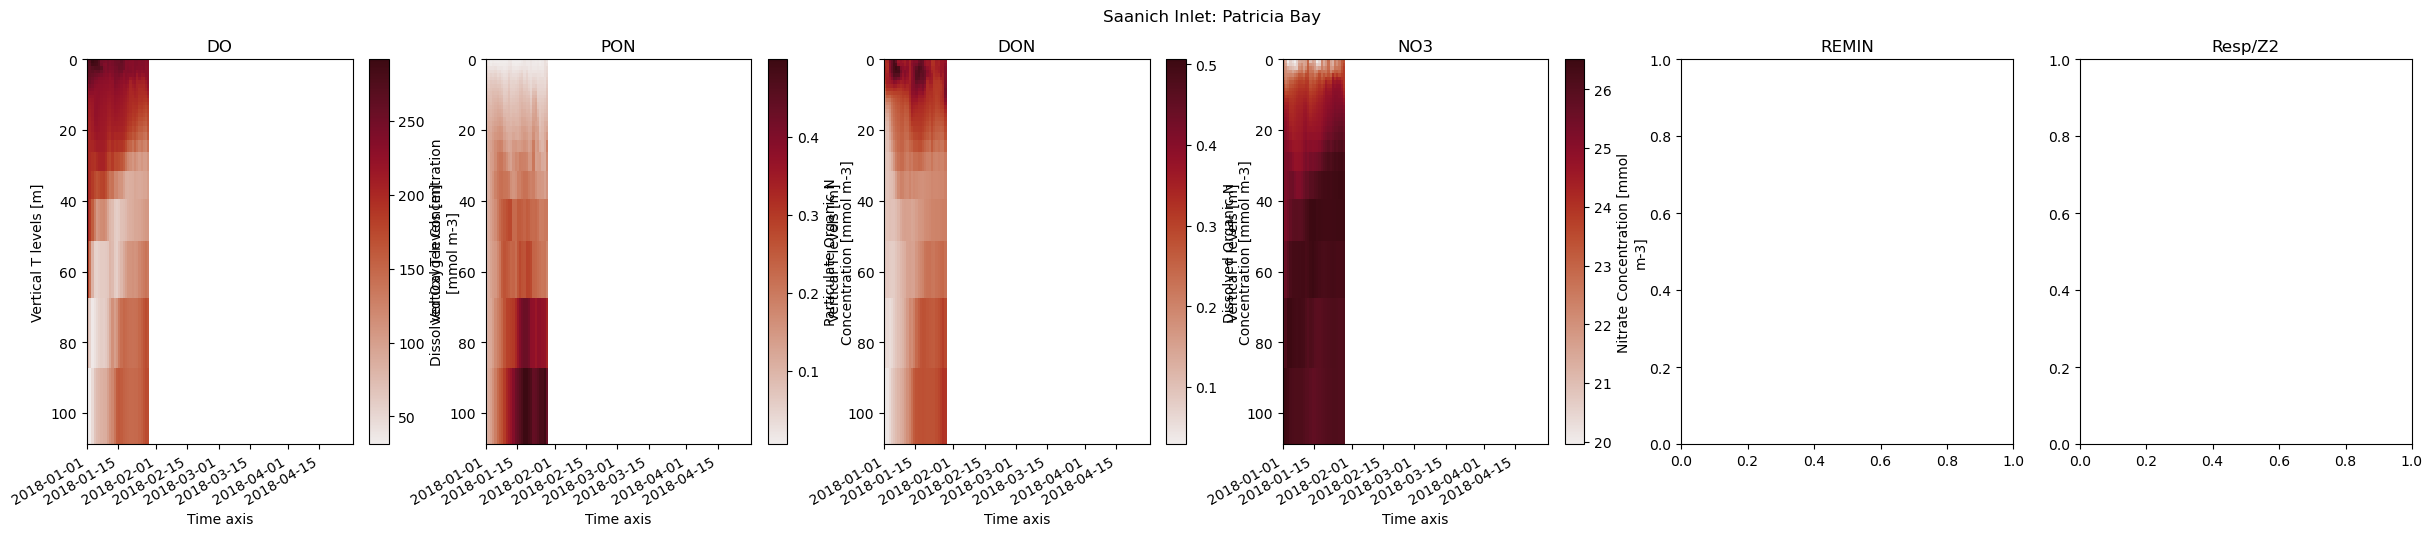

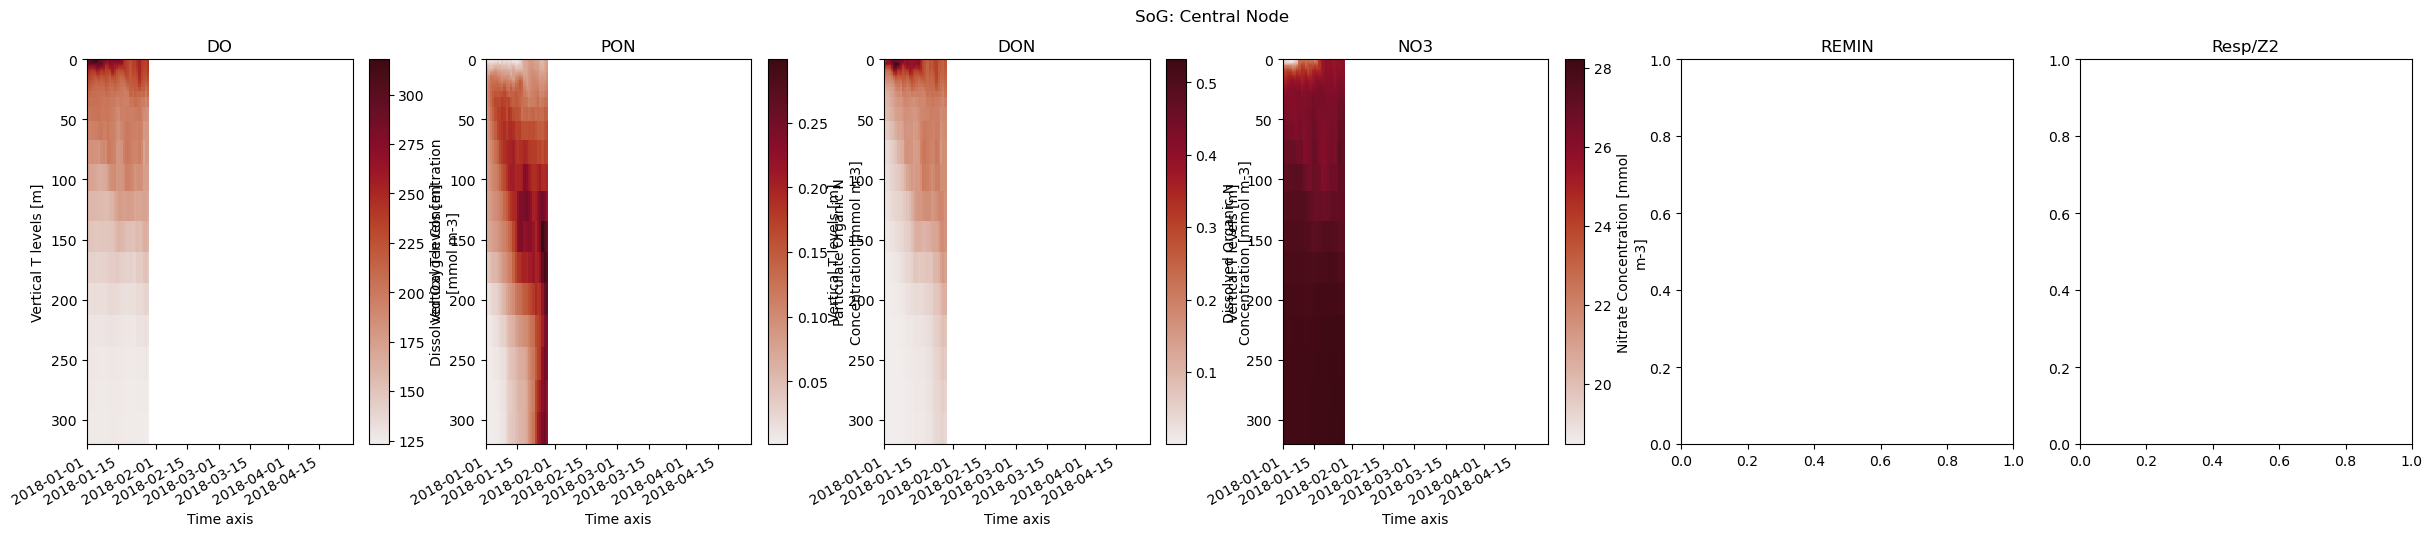

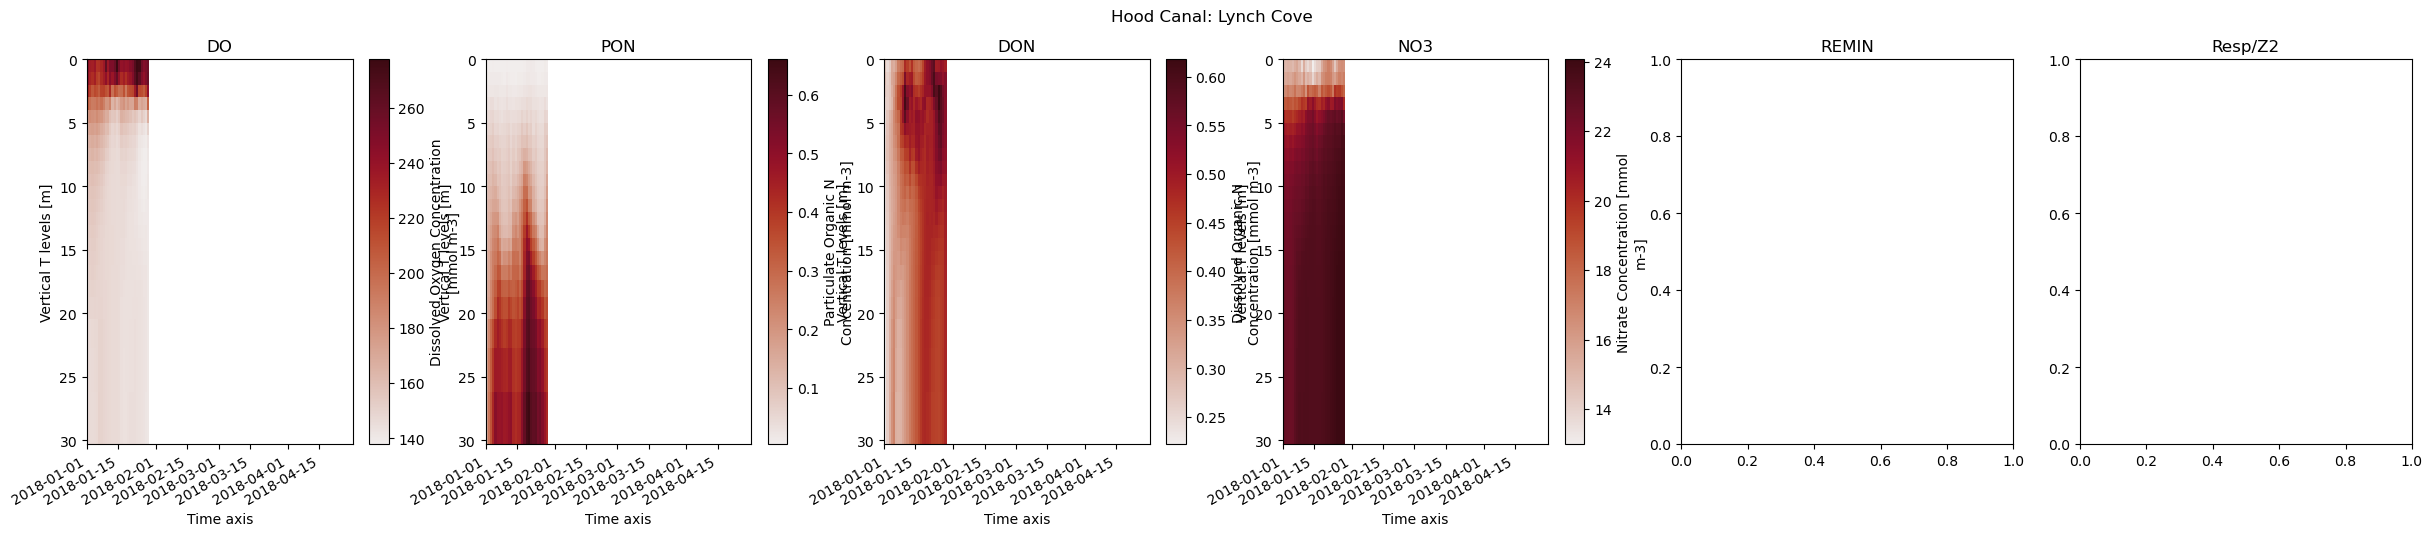

In [9]:

fig, ax = plt.subplots(1, 6, figsize = (30, 5)) 
df_chem90.dissolved_oxygen[:,:kk,jj,ii].plot(ax=ax[0], y="deptht", yincrease=False, cmap=cm.amp,xlim=(startdate,enddate));
df_biol90.particulate_organic_nitrogen[:,:kk,jj,ii].plot(ax=ax[1], y="deptht", yincrease=False, cmap=cm.amp,xlim=(startdate,enddate));
df_biol90.dissolved_organic_nitrogen[:,:kk,jj,ii].plot(ax=ax[2], y="deptht", yincrease=False, cmap=cm.amp,xlim=(startdate,enddate));
df_biol90.nitrate[:,:kk,jj,ii].plot(ax=ax[3], y="deptht", yincrease=False, cmap=cm.amp,xlim=(startdate,enddate));
#df_diag90.RMIN[:,:kk,jj,ii].plot(ax=ax[4], y="deptht", yincrease=False, cmap=cm.rain,xlim=(startdate,enddate));
#df_diag90.RMES[:,:kk,jj,ii].plot(ax=ax[5], y="deptht", yincrease=False, cmap=cm.rain,xlim=(startdate,enddate));
ax[0].set_title('DO')
ax[1].set_title('PON')
ax[2].set_title('DON')
ax[3].set_title('NO3')
ax[4].set_title('REMIN')
ax[5].set_title('Resp/Z2')
fig.suptitle('Saanich Inlet: Patricia Bay')
fig, ax = plt.subplots(1, 6, figsize = (30, 5)) 
df_chem90.dissolved_oxygen[:,:kks,jjs,iis].plot(ax=ax[0], y="deptht", yincrease=False, cmap=cm.amp,xlim=(startdate,enddate));
df_biol90.particulate_organic_nitrogen[:,:kks,jjs,iis].plot(ax=ax[1], y="deptht", yincrease=False, cmap=cm.amp,xlim=(startdate,enddate));
df_biol90.dissolved_organic_nitrogen[:,:kks,jjs,iis].plot(ax=ax[2], y="deptht", yincrease=False, cmap=cm.amp,xlim=(startdate,enddate));
df_biol90.nitrate[:,:kks,jjs,iis].plot(ax=ax[3], y="deptht", yincrease=False, cmap=cm.amp,xlim=(startdate,enddate));
#df_diag90.RMIN[:,:kks,jjs,iis].plot(ax=ax[4], y="deptht", yincrease=False, cmap=cm.rain,xlim=(startdate,enddate));
#df_diag90.RMES[:,:kks,jjs,iis].plot(ax=ax[5], y="deptht", yincrease=False, cmap=cm.rain,xlim=(startdate,enddate));
ax[0].set_title('DO')
ax[1].set_title('PON')
ax[2].set_title('DON')
ax[3].set_title('NO3')
ax[4].set_title('REMIN')
ax[5].set_title('Resp/Z2')
fig.suptitle('SoG: Central Node')
fig, ax = plt.subplots(1, 6, figsize = (30, 5)) 
df_chem90.dissolved_oxygen[:,:kkt,jjt,iit].plot(ax=ax[0], y="deptht", yincrease=False, cmap=cm.amp,xlim=(startdate,enddate));
df_biol90.particulate_organic_nitrogen[:,:kkt,jjt,iit].plot(ax=ax[1], y="deptht", yincrease=False, cmap=cm.amp,xlim=(startdate,enddate));
df_biol90.dissolved_organic_nitrogen[:,:kkt,jjt,iit].plot(ax=ax[2], y="deptht", yincrease=False, cmap=cm.amp,xlim=(startdate,enddate));
df_biol90.nitrate[:,:kkt,jjt,iit].plot(ax=ax[3], y="deptht", yincrease=False, cmap=cm.amp,xlim=(startdate,enddate));
#df_diag90.RMIN[:,:kkt,jjt,iit].plot(ax=ax[4], y="deptht", yincrease=False, cmap=cm.rain,xlim=(startdate,enddate));
#df_diag90.RMES[:,:kkt,jjt,iit].plot(ax=ax[5], y="deptht", yincrease=False, cmap=cm.rain,xlim=(startdate,enddate));
ax[0].set_title('DO')
ax[1].set_title('PON')
ax[2].set_title('DON')
ax[3].set_title('NO3')
ax[4].set_title('REMIN')
ax[5].set_title('Resp/Z2')
fig.suptitle('Hood Canal: Lynch Cove')


Text(0.5, 0.98, 'Saanich Inlet: REF80,Bremin15')

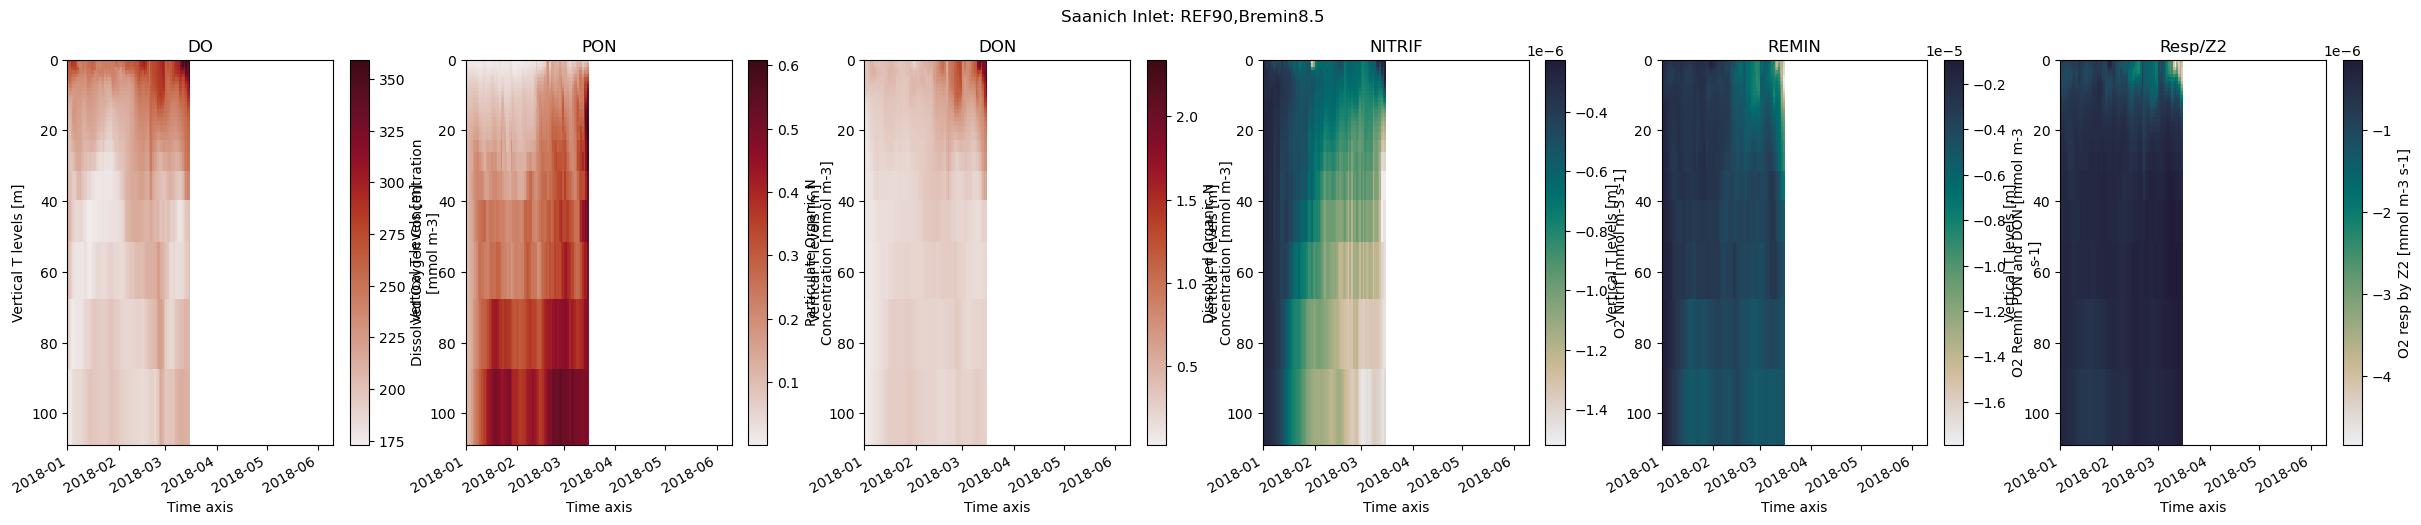

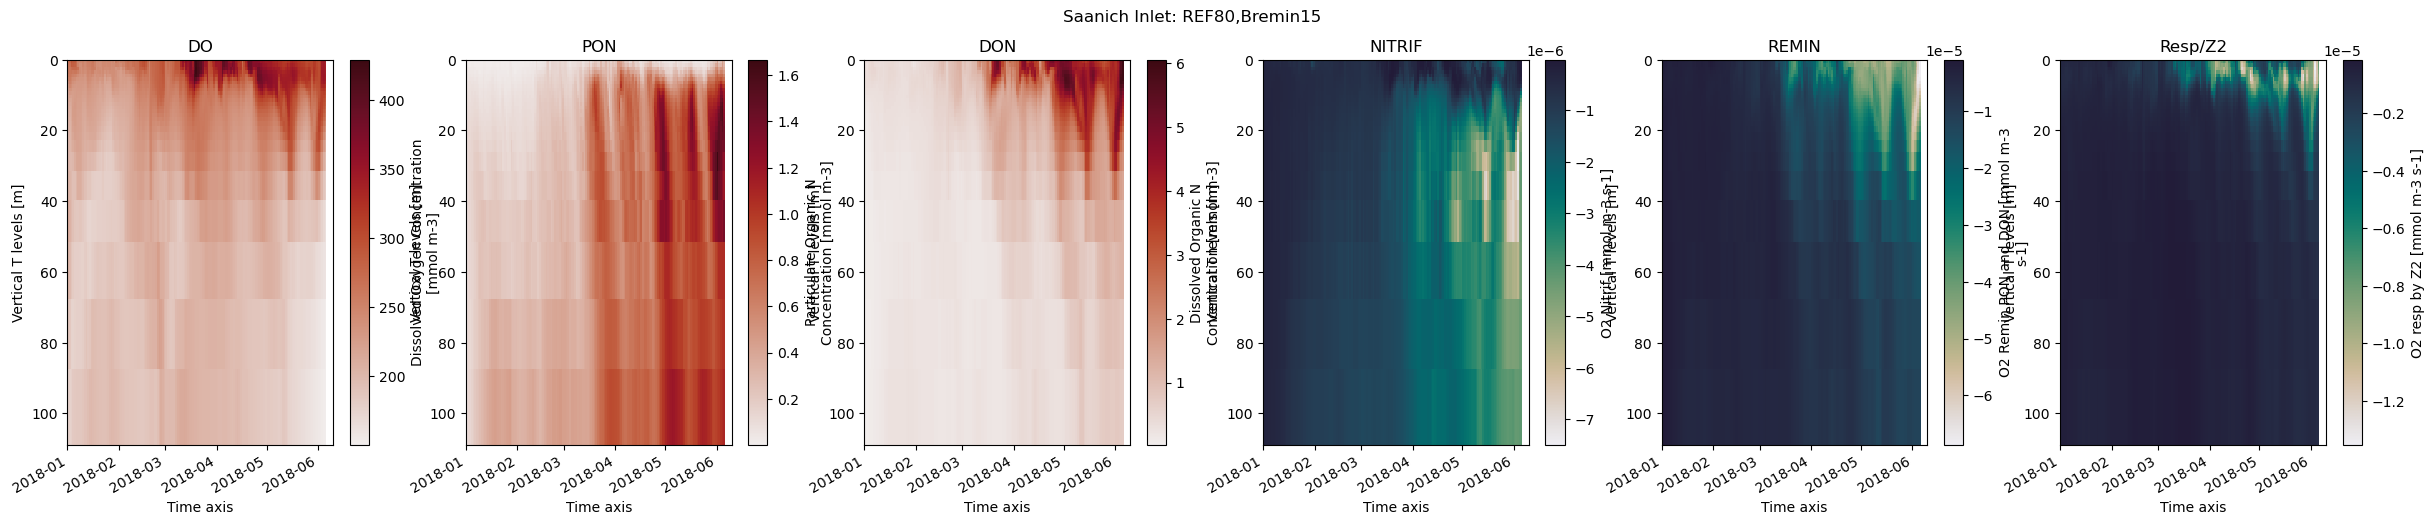

In [7]:
fig, ax = plt.subplots(1, 6, figsize = (30, 5)) 
df_chem90.dissolved_oxygen[:,:kk,jj,ii].plot(ax=ax[0], y="deptht", yincrease=False, cmap=cm.amp,xlim=(startdate,enddate));
df_biol90.particulate_organic_nitrogen[:,:kk,jj,ii].plot(ax=ax[1], y="deptht", yincrease=False, cmap=cm.amp,xlim=(startdate,enddate));
df_biol90.dissolved_organic_nitrogen[:,:kk,jj,ii].plot(ax=ax[2], y="deptht", yincrease=False, cmap=cm.amp,xlim=(startdate,enddate));
df_diag90.NITR[:,:kk,jj,ii].plot(ax=ax[3], y="deptht", yincrease=False, cmap=cm.rain,xlim=(startdate,enddate));
df_diag90.RMIN[:,:kk,jj,ii].plot(ax=ax[4], y="deptht", yincrease=False, cmap=cm.rain,xlim=(startdate,enddate));
df_diag90.RMES[:,:kk,jj,ii].plot(ax=ax[5], y="deptht", yincrease=False, cmap=cm.rain,xlim=(startdate,enddate));
ax[0].set_title('DO')
ax[1].set_title('PON')
ax[2].set_title('DON')
ax[3].set_title('NITRIF')
ax[4].set_title('REMIN')
ax[5].set_title('Resp/Z2')
fig.suptitle('Saanich Inlet: REF90,Bremin8.5')
fig, ax = plt.subplots(1, 6, figsize = (30, 5)) 
df_chem.dissolved_oxygen[:,:kk,jj,ii].plot(ax=ax[0], y="deptht", yincrease=False, cmap=cm.amp,xlim=(startdate,enddate));
df_biol.particulate_organic_nitrogen[:,:kk,jj,ii].plot(ax=ax[1], y="deptht", yincrease=False, cmap=cm.amp,xlim=(startdate,enddate));
df_biol.dissolved_organic_nitrogen[:,:kk,jj,ii].plot(ax=ax[2], y="deptht", yincrease=False, cmap=cm.amp,xlim=(startdate,enddate));
df_diag.NITR[:,:kk,jj,ii].plot(ax=ax[3], y="deptht", yincrease=False, cmap=cm.rain,xlim=(startdate,enddate));
df_diag.RMIN[:,:kk,jj,ii].plot(ax=ax[4], y="deptht", yincrease=False, cmap=cm.rain,xlim=(startdate,enddate));
df_diag.RMES[:,:kk,jj,ii].plot(ax=ax[5], y="deptht", yincrease=False, cmap=cm.rain,xlim=(startdate,enddate));
ax[0].set_title('DO')
ax[1].set_title('PON')
ax[2].set_title('DON')
ax[3].set_title('NITRIF')
ax[4].set_title('REMIN')
ax[5].set_title('Resp/Z2')
fig.suptitle('Saanich Inlet: REF80,Bremin15')

In [6]:
fig, ax = plt.subplots(1, 6, figsize = (30, 5)) 
oxydif.plot(ax=ax[0], y="deptht", yincrease=False, cmap=cm.balance,xlim=(startdate,enddate))
pondif.plot(ax=ax[1], y="deptht", yincrease=False, cmap=cm.balance,xlim=(startdate,enddate))
nppdif.plot(ax=ax[2], y="deptht", yincrease=False, cmap=cm.balance,xlim=(startdate,enddate))
nitdif.plot(ax=ax[3], y="deptht", yincrease=False, cmap=cm.balance,xlim=(startdate,enddate))
remdif.plot(ax=ax[4], y="deptht", yincrease=False, cmap=cm.balance,xlim=(startdate,enddate))
mesdif.plot(ax=ax[5], y="deptht", yincrease=False, cmap=cm.balance,xlim=(startdate,enddate))
ax[0].set_title('DO')
ax[1].set_title('PON')
ax[2].set_title('DON')
ax[3].set_title('NITRIF')
ax[4].set_title('REMIN')
ax[5].set_title('Resp/Z2')
fig.suptitle('Saanich Inlet: (REF90,Bremin8.5) - (REF80,Bremin15)')

: 

In [6]:
fig, ax = plt.subplots(1, 6, figsize = (30, 5)) 
df_chem90.dissolved_oxygen[:,:kk,jj,ii].plot(ax=ax[0], y="deptht", yincrease=False, cmap=cm.amp,xlim=(startdate,enddate));
df_biol90.particulate_organic_nitrogen[:,:kk,jj,ii].plot(ax=ax[1], y="deptht", yincrease=False, cmap=cm.amp,xlim=(startdate,enddate));
df_biol90.dissolved_organic_nitrogen[:,:kk,jj,ii].plot(ax=ax[2], y="deptht", yincrease=False, cmap=cm.amp,xlim=(startdate,enddate));
df_diag90.NITR[:,:kk,jj,ii].plot(ax=ax[3], y="deptht", yincrease=False, cmap=cm.rain,xlim=(startdate,enddate));
df_diag90.RMIN[:,:kk,jj,ii].plot(ax=ax[4], y="deptht", yincrease=False, cmap=cm.rain,xlim=(startdate,enddate));
df_diag90.RMES[:,:kk,jj,ii].plot(ax=ax[5], y="deptht", yincrease=False, cmap=cm.rain,xlim=(startdate,enddate));
ax[0].set_title('DO')
ax[1].set_title('PON')
ax[2].set_title('DON')
ax[3].set_title('NITRIF')
ax[4].set_title('REMIN')
ax[5].set_title('Resp/Z2')
fig.suptitle('Saanich Inlet: REF90,Bremin8.5')
fig, ax = plt.subplots(1, 6, figsize = (30, 5)) 
df_chem.dissolved_oxygen[:,:kk,jj,ii].plot(ax=ax[0], y="deptht", yincrease=False, cmap=cm.amp,xlim=(startdate,enddate));
df_biol.particulate_organic_nitrogen[:,:kk,jj,ii].plot(ax=ax[1], y="deptht", yincrease=False, cmap=cm.amp,xlim=(startdate,enddate));
df_biol.dissolved_organic_nitrogen[:,:kk,jj,ii].plot(ax=ax[2], y="deptht", yincrease=False, cmap=cm.amp,xlim=(startdate,enddate));
df_diag.NITR[:,:kk,jj,ii].plot(ax=ax[3], y="deptht", yincrease=False, cmap=cm.rain,xlim=(startdate,enddate));
df_diag.RMIN[:,:kk,jj,ii].plot(ax=ax[4], y="deptht", yincrease=False, cmap=cm.rain,xlim=(startdate,enddate));
df_diag.RMES[:,:kk,jj,ii].plot(ax=ax[5], y="deptht", yincrease=False, cmap=cm.rain,xlim=(startdate,enddate));
ax[0].set_title('DO')
ax[1].set_title('PON')
ax[2].set_title('DON')
ax[3].set_title('NITRIF')
ax[4].set_title('REMIN')
ax[5].set_title('Resp/Z2')
fig.suptitle('Saanich Inlet: REF80,Bremin15')
fig, ax = plt.subplots(1, 6, figsize = (30, 5)) 
oxydif.plot(ax=ax[0], y="deptht", yincrease=False, cmap=cm.balance,xlim=(startdate,enddate))
pondif.plot(ax=ax[1], y="deptht", yincrease=False, cmap=cm.balance,xlim=(startdate,enddate))
nppdif.plot(ax=ax[2], y="deptht", yincrease=False, cmap=cm.balance,xlim=(startdate,enddate))
nitdif.plot(ax=ax[3], y="deptht", yincrease=False, cmap=cm.balance,xlim=(startdate,enddate))
remdif.plot(ax=ax[4], y="deptht", yincrease=False, cmap=cm.balance,xlim=(startdate,enddate))
mesdif.plot(ax=ax[5], y="deptht", yincrease=False, cmap=cm.balance,xlim=(startdate,enddate))
ax[0].set_title('DO')
ax[1].set_title('PON')
ax[2].set_title('DON')
ax[3].set_title('NITRIF')
ax[4].set_title('REMIN')
ax[5].set_title('Resp/Z2')
fig.suptitle('Saanich Inlet: (REF90,Bremin8.5) - (REF80,Bremin15)')

: 

Text(0.5, 0.98, 'Saanich Inlet: (REF80,PSRe-4,Bremin15) - (REF90,PSRe-3,Bremin8.5)')

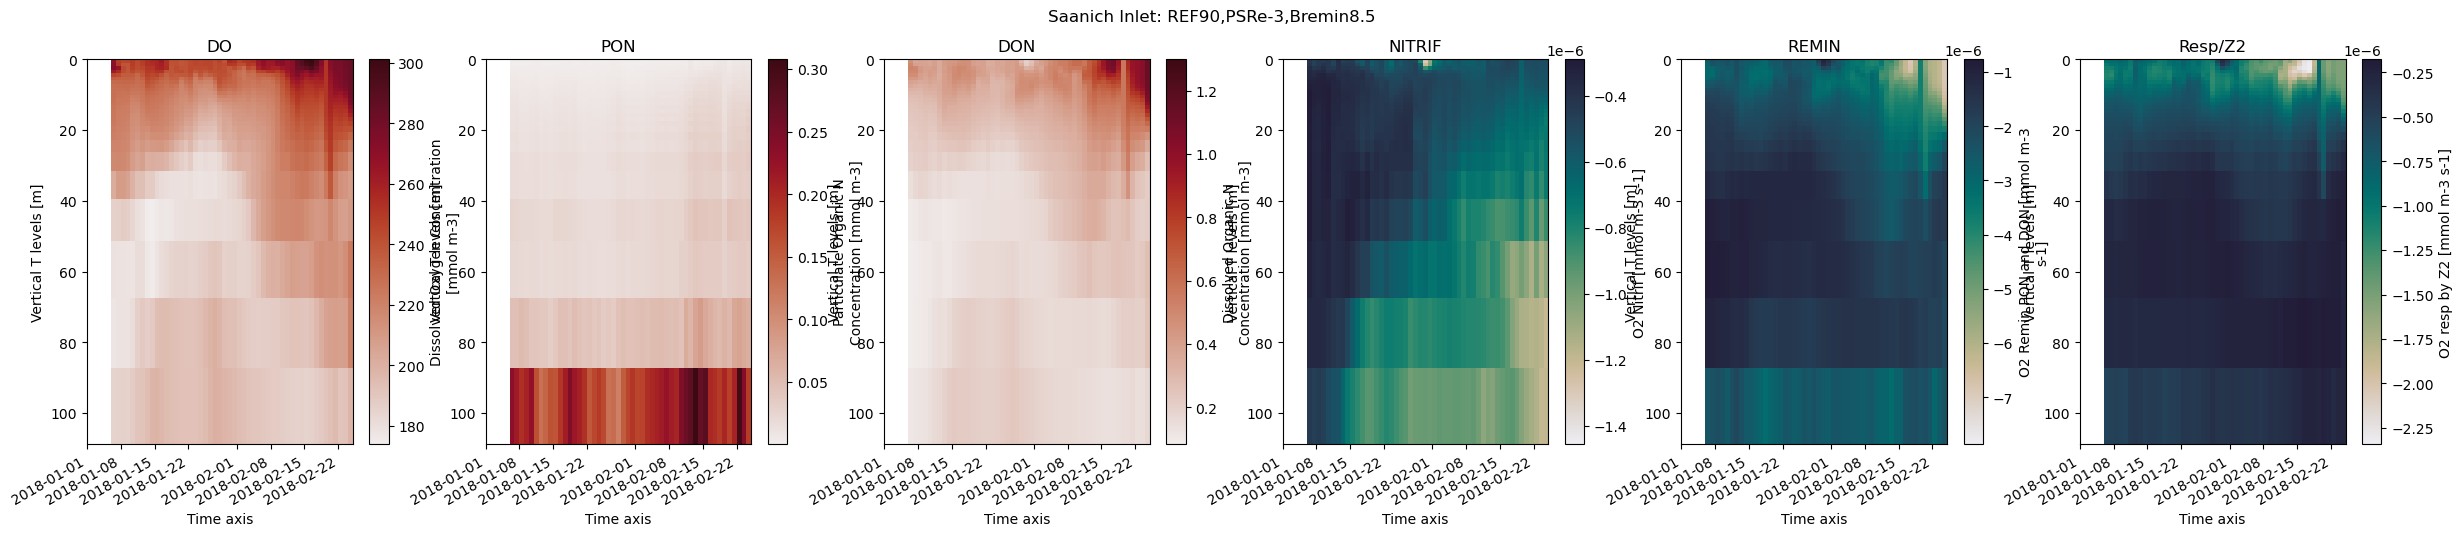

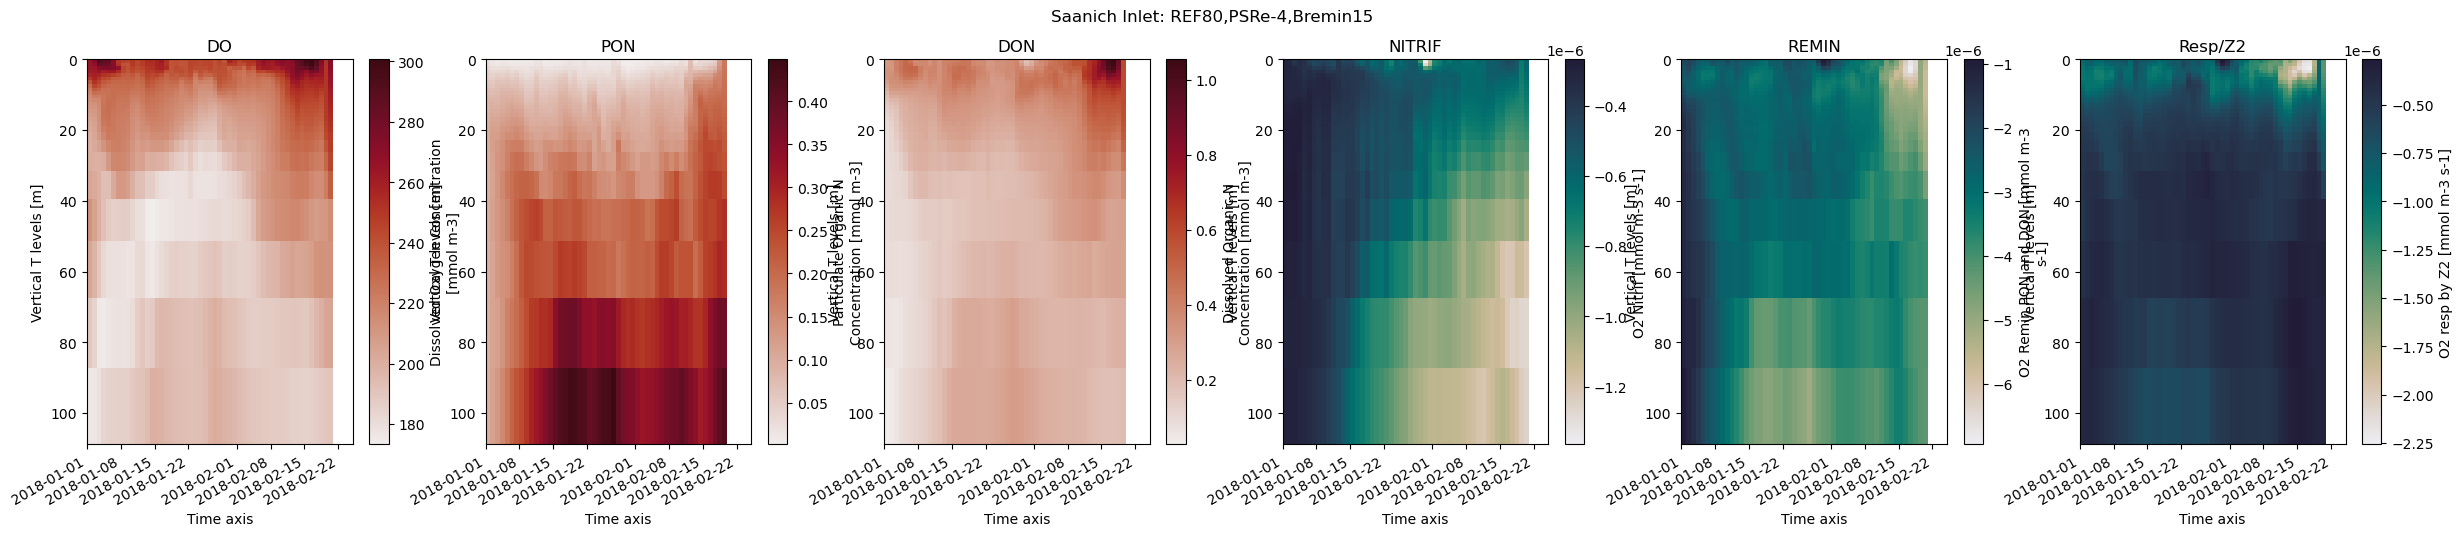

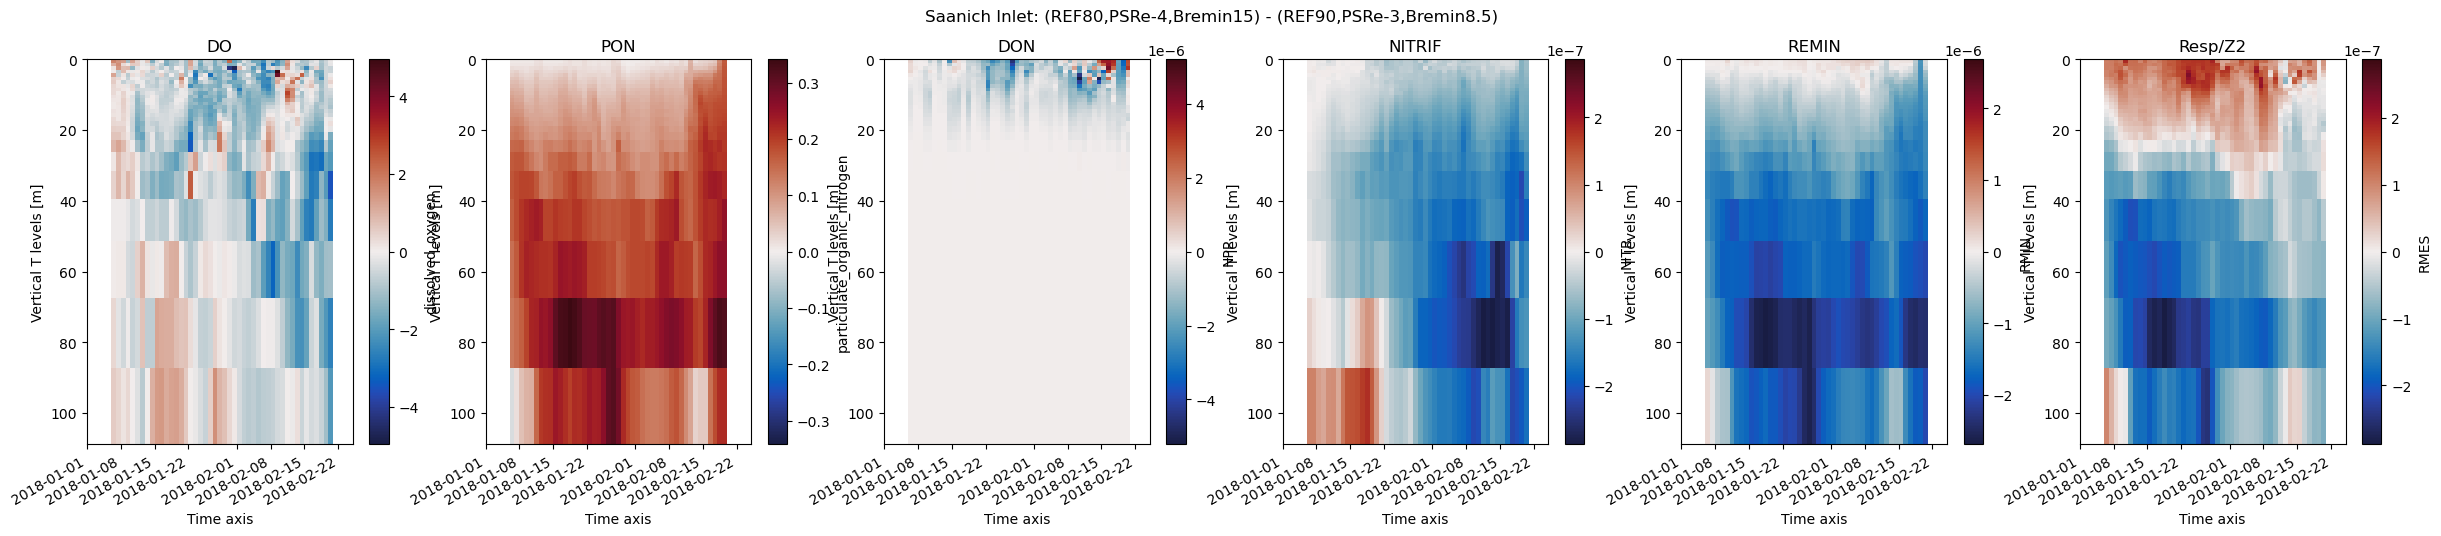

In [20]:
fig, ax = plt.subplots(1, 6, figsize = (30, 5)) 
df_chem90.dissolved_oxygen[:,:kk,jj,ii].plot(ax=ax[0], y="deptht", yincrease=False, cmap=cm.amp,xlim=(startdate,enddate));
df_biol90.particulate_organic_nitrogen[:,:kk,jj,ii].plot(ax=ax[1], y="deptht", yincrease=False, cmap=cm.amp,xlim=(startdate,enddate));
df_biol90.dissolved_organic_nitrogen[:,:kk,jj,ii].plot(ax=ax[2], y="deptht", yincrease=False, cmap=cm.amp,xlim=(startdate,enddate));
df_diag90.NITR[:,:kk,jj,ii].plot(ax=ax[3], y="deptht", yincrease=False, cmap=cm.rain,xlim=(startdate,enddate));
df_diag90.RMIN[:,:kk,jj,ii].plot(ax=ax[4], y="deptht", yincrease=False, cmap=cm.rain,xlim=(startdate,enddate));
df_diag90.RMES[:,:kk,jj,ii].plot(ax=ax[5], y="deptht", yincrease=False, cmap=cm.rain,xlim=(startdate,enddate));
ax[0].set_title('DO')
ax[1].set_title('PON')
ax[2].set_title('DON')
ax[3].set_title('NITRIF')
ax[4].set_title('REMIN')
ax[5].set_title('Resp/Z2')

fig.suptitle('Saanich Inlet: REF90,PSRe-3,Bremin8.5')
fig, ax = plt.subplots(1, 6, figsize = (30, 5)) 
df_chem.dissolved_oxygen[:,:kk,jj,ii].plot(ax=ax[0], y="deptht", yincrease=False, cmap=cm.amp,xlim=(startdate,enddate));
df_biol.particulate_organic_nitrogen[:,:kk,jj,ii].plot(ax=ax[1], y="deptht", yincrease=False, cmap=cm.amp,xlim=(startdate,enddate));
df_biol.dissolved_organic_nitrogen[:,:kk,jj,ii].plot(ax=ax[2], y="deptht", yincrease=False, cmap=cm.amp,xlim=(startdate,enddate));
df_diag.NITR[:,:kk,jj,ii].plot(ax=ax[3], y="deptht", yincrease=False, cmap=cm.rain,xlim=(startdate,enddate));
df_diag.RMIN[:,:kk,jj,ii].plot(ax=ax[4], y="deptht", yincrease=False, cmap=cm.rain,xlim=(startdate,enddate));
df_diag.RMES[:,:kk,jj,ii].plot(ax=ax[5], y="deptht", yincrease=False, cmap=cm.rain,xlim=(startdate,enddate));
ax[0].set_title('DO')
ax[1].set_title('PON')
ax[2].set_title('DON')
ax[3].set_title('NITRIF')
ax[4].set_title('REMIN')
ax[5].set_title('Resp/Z2')
fig.suptitle('Saanich Inlet: REF80,PSRe-4,Bremin15')
fig, ax = plt.subplots(1, 6, figsize = (30, 5)) 
oxydif.plot(ax=ax[0], y="deptht", yincrease=False, cmap=cm.balance,xlim=(startdate,enddate))
pondif.plot(ax=ax[1], y="deptht", yincrease=False, cmap=cm.balance,xlim=(startdate,enddate))
nppdif.plot(ax=ax[2], y="deptht", yincrease=False, cmap=cm.balance,xlim=(startdate,enddate))
nitdif.plot(ax=ax[3], y="deptht", yincrease=False, cmap=cm.balance,xlim=(startdate,enddate))
remdif.plot(ax=ax[4], y="deptht", yincrease=False, cmap=cm.balance,xlim=(startdate,enddate))
mesdif.plot(ax=ax[5], y="deptht", yincrease=False, cmap=cm.balance,xlim=(startdate,enddate))
ax[0].set_title('DO')
ax[1].set_title('PON')
ax[2].set_title('DON')
ax[3].set_title('NITRIF')
ax[4].set_title('REMIN')
ax[5].set_title('Resp/Z2')
fig.suptitle('Saanich Inlet: (REF80,PSRe-4,Bremin15) - (REF90,PSRe-3,Bremin8.5)')

# Strait of Georgia - Central Node

Text(0.5, 0.98, 'Central node: (REF90,Bremin8.5) - (REF90,Bremin15)')

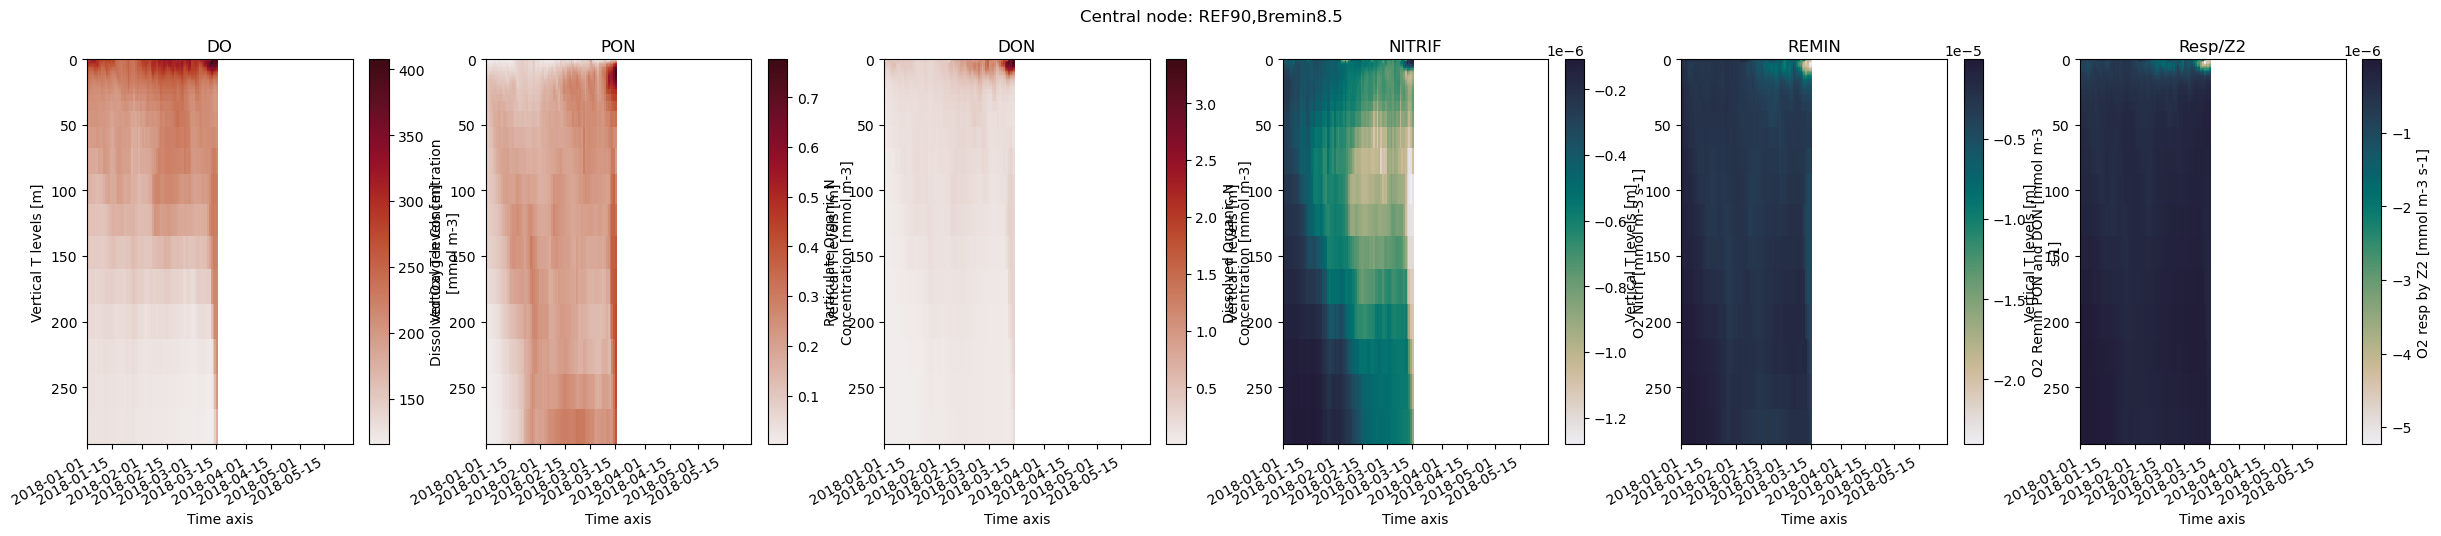

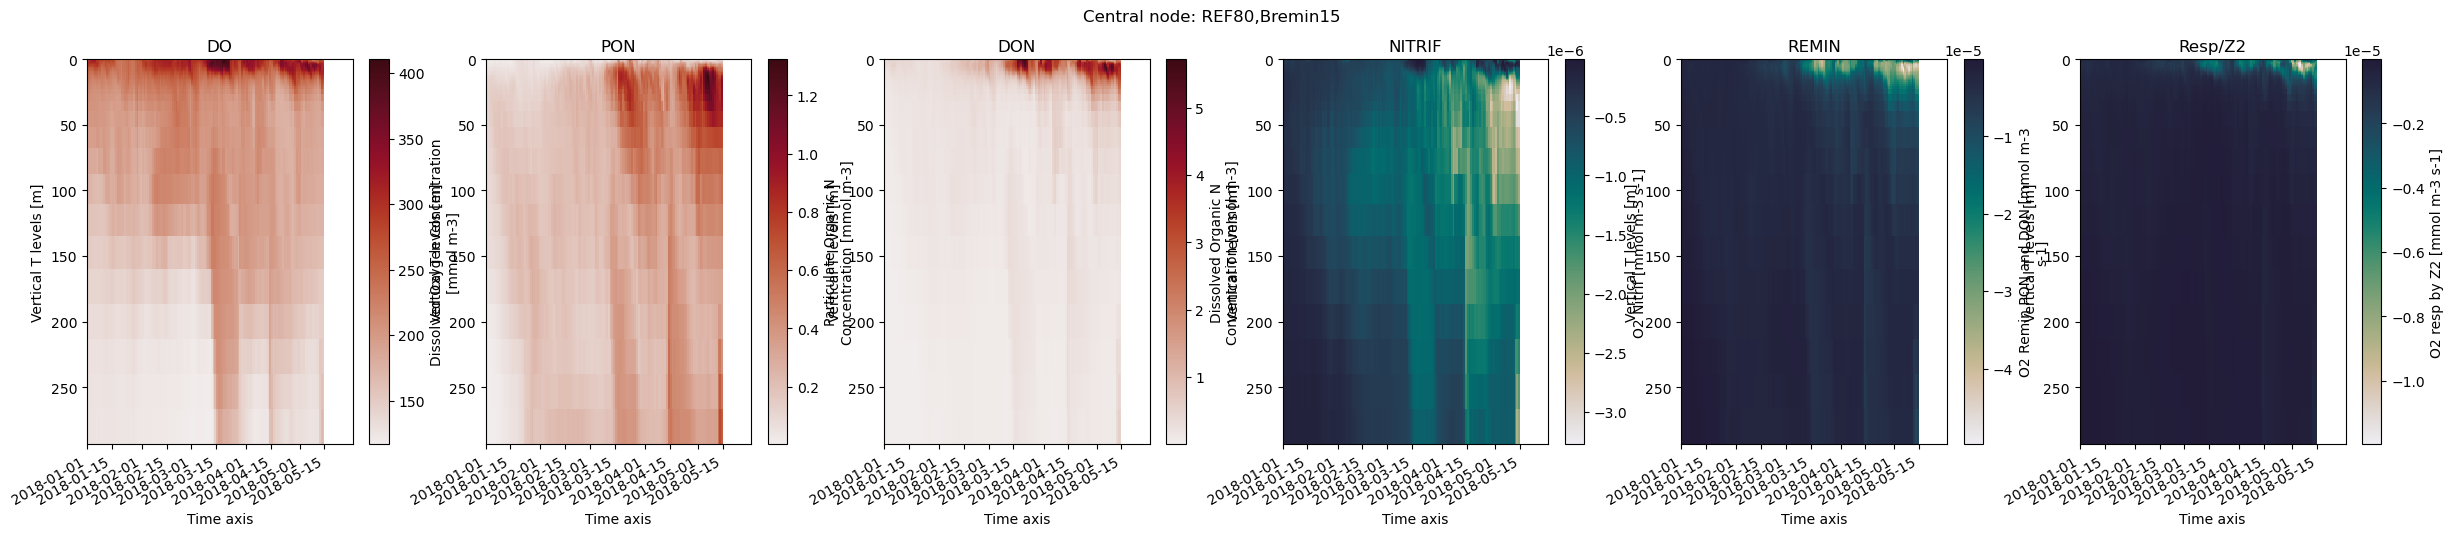

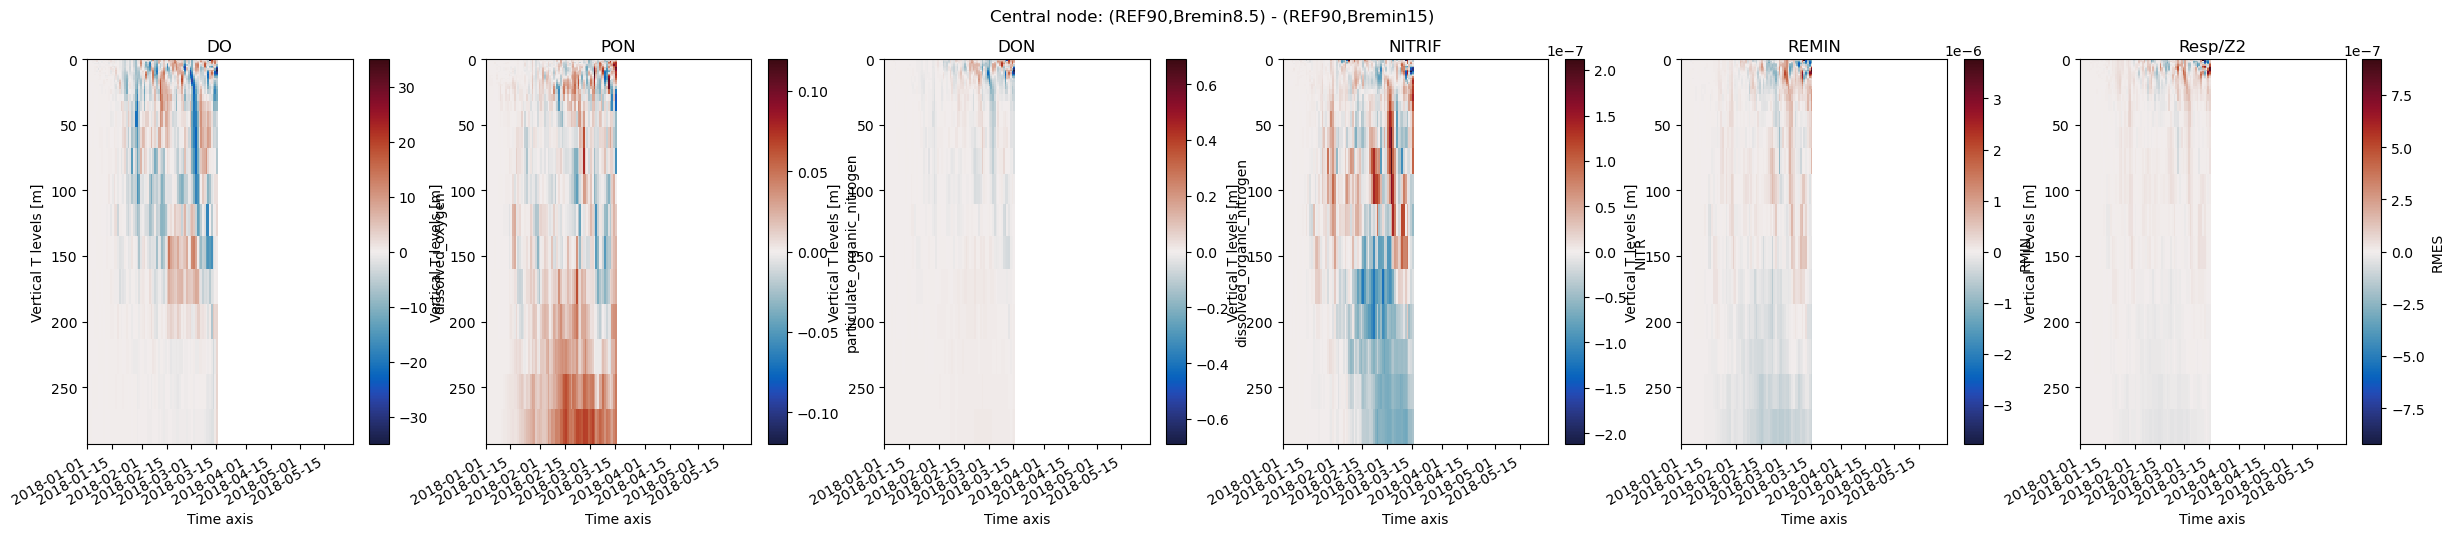

In [ ]:
fig, ax = plt.subplots(1, 6, figsize = (30, 5)) 
df_chem90.dissolved_oxygen[:,:kks,jjs,iis].plot(ax=ax[0], y="deptht", yincrease=False, cmap=cm.amp,xlim=(startdate,enddate));
df_biol90.particulate_organic_nitrogen[:,:kks,jjs,iis].plot(ax=ax[1], y="deptht", yincrease=False, cmap=cm.amp,xlim=(startdate,enddate));
df_biol90.dissolved_organic_nitrogen[:,:kks,jjs,iis].plot(ax=ax[2], y="deptht", yincrease=False, cmap=cm.amp,xlim=(startdate,enddate));
df_diag90.NITR[:,:kks,jjs,iis].plot(ax=ax[3], y="deptht", yincrease=False, cmap=cm.rain,xlim=(startdate,enddate));
df_diag90.RMIN[:,:kks,jjs,iis].plot(ax=ax[4], y="deptht", yincrease=False, cmap=cm.rain,xlim=(startdate,enddate));
df_diag90.RMES[:,:kks,jjs,iis].plot(ax=ax[5], y="deptht", yincrease=False, cmap=cm.rain,xlim=(startdate,enddate));
ax[0].set_title('DO')
ax[1].set_title('PON')
ax[2].set_title('DON')
ax[3].set_title('NITRIF')
ax[4].set_title('REMIN')
ax[5].set_title('Resp/Z2')
fig.suptitle('Central node: REF90,Bremin8.5')
fig, ax = plt.subplots(1, 6, figsize = (30, 5)) 
df_chem.dissolved_oxygen[:,:kks,jjs,iis].plot(ax=ax[0], y="deptht", yincrease=False, cmap=cm.amp,xlim=(startdate,enddate));
df_biol.particulate_organic_nitrogen[:,:kks,jjs,iis].plot(ax=ax[1], y="deptht", yincrease=False, cmap=cm.amp,xlim=(startdate,enddate));
df_biol.dissolved_organic_nitrogen[:,:kks,jjs,iis].plot(ax=ax[2], y="deptht", yincrease=False, cmap=cm.amp,xlim=(startdate,enddate));
df_diag.NITR[:,:kks,jjs,iis].plot(ax=ax[3], y="deptht", yincrease=False, cmap=cm.rain,xlim=(startdate,enddate));
df_diag.RMIN[:,:kks,jjs,iis].plot(ax=ax[4], y="deptht", yincrease=False, cmap=cm.rain,xlim=(startdate,enddate));
df_diag.RMES[:,:kks,jjs,iis].plot(ax=ax[5], y="deptht", yincrease=False, cmap=cm.rain,xlim=(startdate,enddate));
ax[0].set_title('DO')
ax[1].set_title('PON')
ax[2].set_title('DON')
ax[3].set_title('NITRIF')
ax[4].set_title('REMIN')
ax[5].set_title('Resp/Z2')
fig.suptitle('Central node: REF80,Bremin15')
fig, ax = plt.subplots(1, 6, figsize = (30, 5)) 
oxydifs.plot(ax=ax[0], y="deptht", yincrease=False, cmap=cm.balance,xlim=(startdate,enddate))
pondifs.plot(ax=ax[1], y="deptht", yincrease=False, cmap=cm.balance,xlim=(startdate,enddate))
dondifs.plot(ax=ax[2], y="deptht", yincrease=False, cmap=cm.balance,xlim=(startdate,enddate))
nitdifs.plot(ax=ax[3], y="deptht", yincrease=False, cmap=cm.balance,xlim=(startdate,enddate))
remdifs.plot(ax=ax[4], y="deptht", yincrease=False, cmap=cm.balance,xlim=(startdate,enddate))
mesdifs.plot(ax=ax[5], y="deptht", yincrease=False, cmap=cm.balance,xlim=(startdate,enddate))
ax[0].set_title('DO')
ax[1].set_title('PON')
ax[2].set_title('DON')
ax[3].set_title('NITRIF')
ax[4].set_title('REMIN')
ax[5].set_title('Resp/Z2')
fig.suptitle('Central node: (REF90,Bremin8.5) - (REF90,Bremin15)')

Text(0.5, 0.98, 'Central node: (REF80,PSRe-4,Bremin15) - (REF90,PSRe-3,Bremin8.5)')

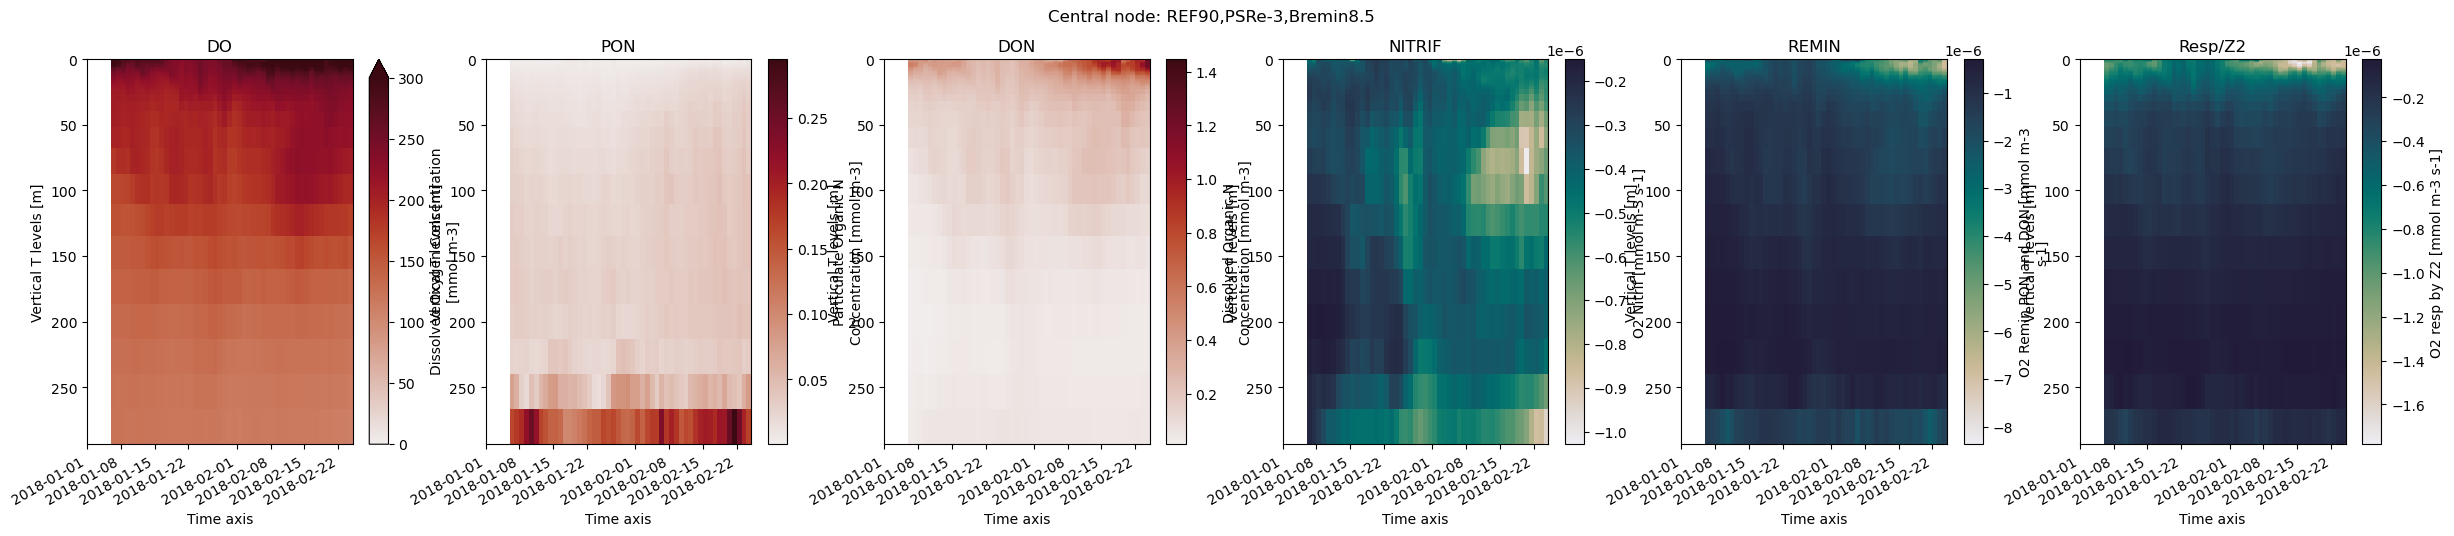

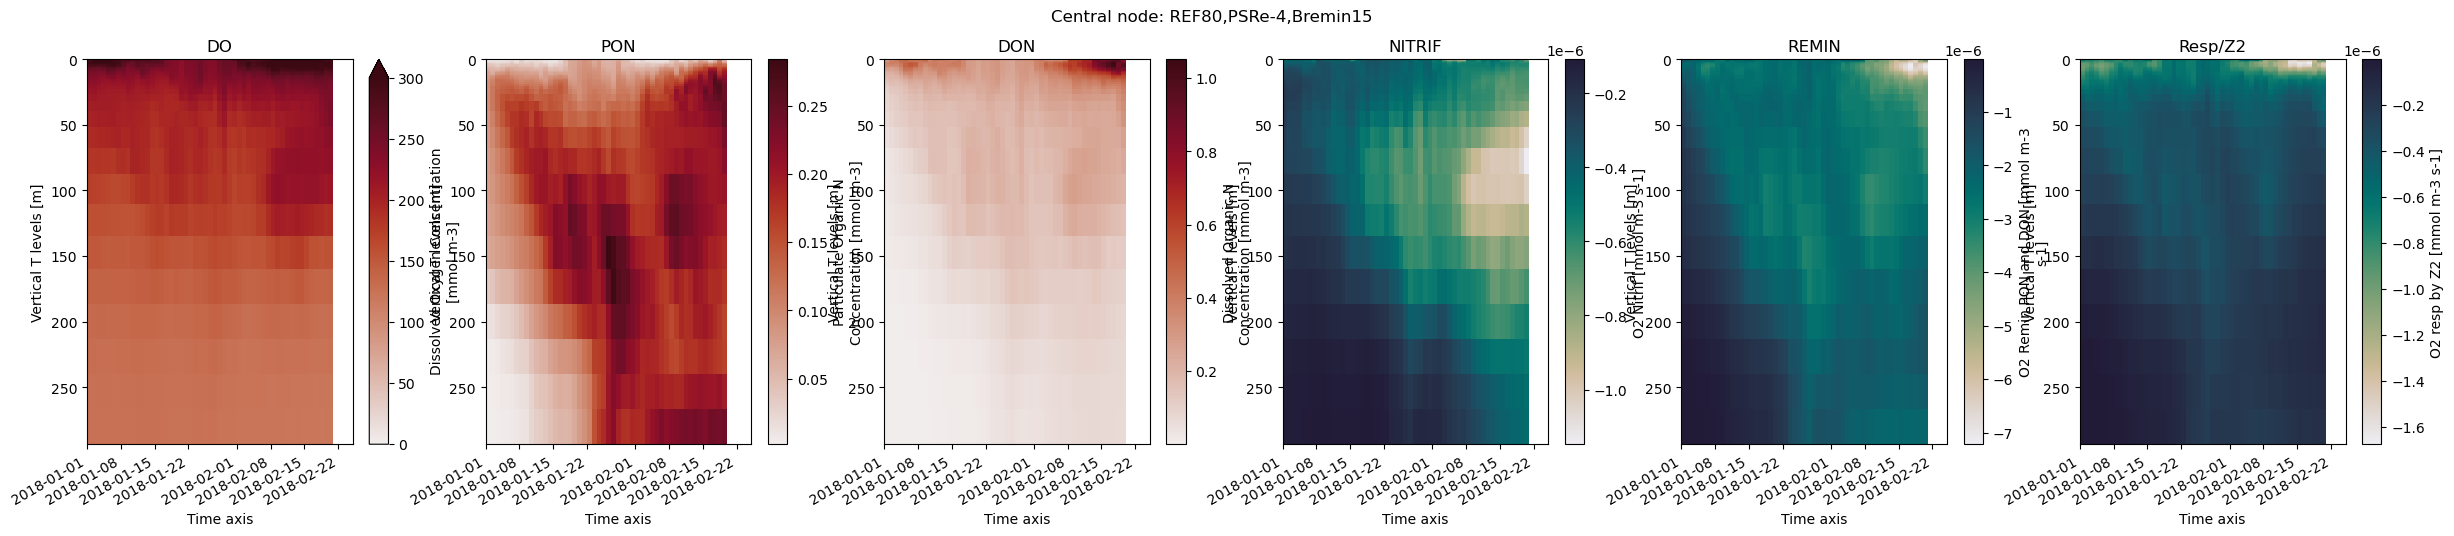

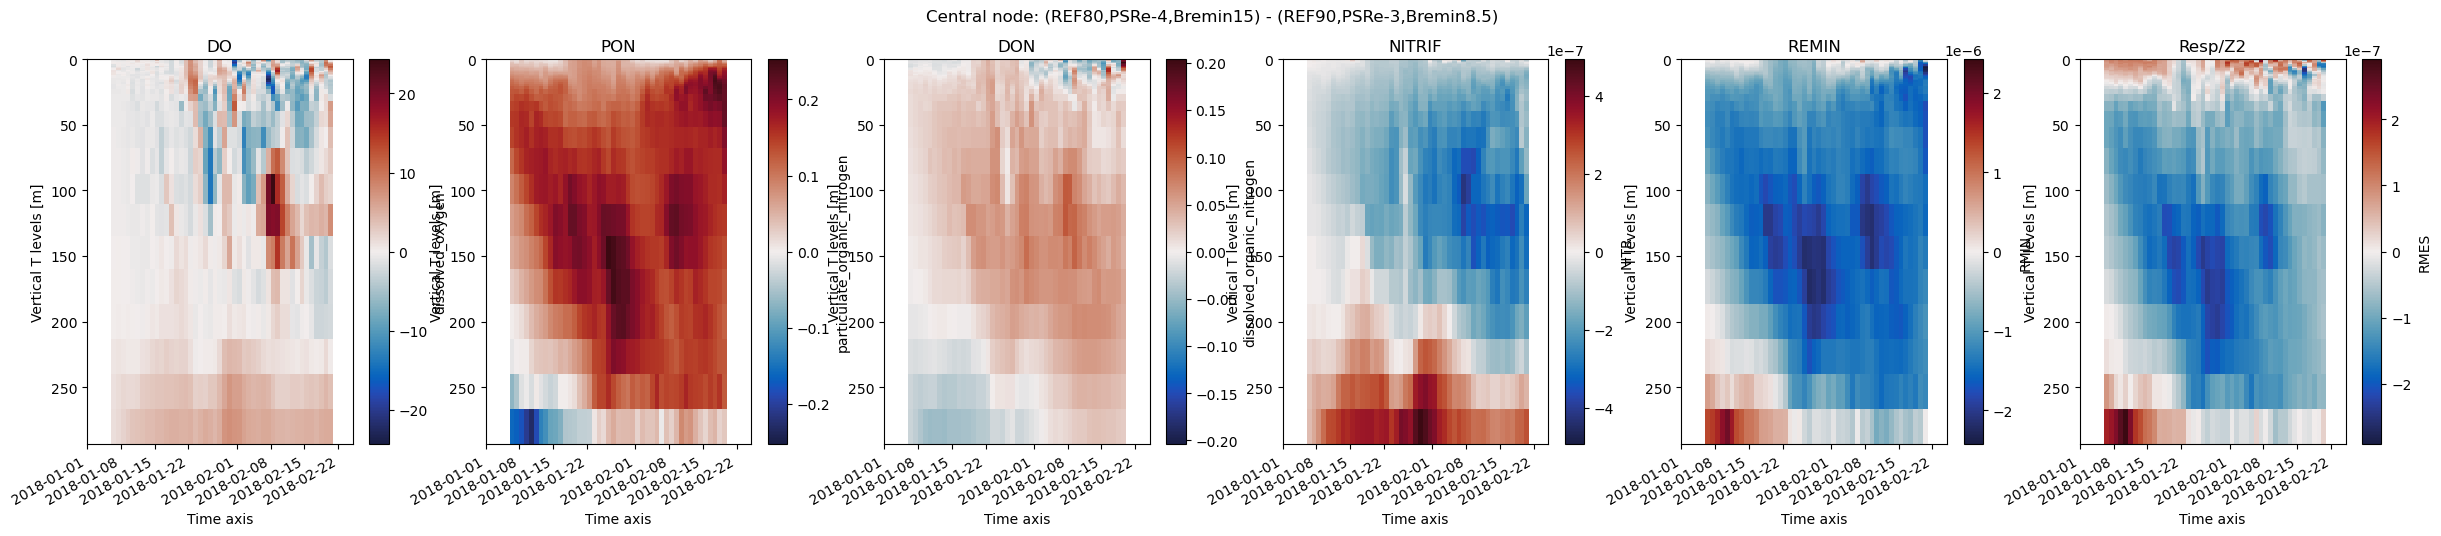

In [21]:
fig, ax = plt.subplots(1, 6, figsize = (30, 5)) 
df_chem90.dissolved_oxygen[:,:kks,jjs,iis].plot(ax=ax[0], y="deptht", yincrease=False, cmap=cm.amp,vmin=0,vmax=300,xlim=(startdate,enddate));
df_biol90.particulate_organic_nitrogen[:,:kks,jjs,iis].plot(ax=ax[1], y="deptht", yincrease=False, cmap=cm.amp,xlim=(startdate,enddate));
df_biol90.dissolved_organic_nitrogen[:,:kks,jjs,iis].plot(ax=ax[2], y="deptht", yincrease=False, cmap=cm.amp,xlim=(startdate,enddate));
df_diag90.NITR[:,:kks,jjs,iis].plot(ax=ax[3], y="deptht", yincrease=False, cmap=cm.rain,xlim=(startdate,enddate));
df_diag90.RMIN[:,:kks,jjs,iis].plot(ax=ax[4], y="deptht", yincrease=False, cmap=cm.rain,xlim=(startdate,enddate));
df_diag90.RMES[:,:kks,jjs,iis].plot(ax=ax[5], y="deptht", yincrease=False, cmap=cm.rain,xlim=(startdate,enddate));
ax[0].set_title('DO')
ax[1].set_title('PON')
ax[2].set_title('DON')
ax[3].set_title('NITRIF')
ax[4].set_title('REMIN')
ax[5].set_title('Resp/Z2')
fig.suptitle('Central node: REF90,PSRe-3,Bremin8.5')
fig, ax = plt.subplots(1, 6, figsize = (30, 5)) 
df_chem.dissolved_oxygen[:,:kks,jjs,iis].plot(ax=ax[0], y="deptht", yincrease=False, cmap=cm.amp,vmin=0,vmax=300,xlim=(startdate,enddate));
df_biol.particulate_organic_nitrogen[:,:kks,jjs,iis].plot(ax=ax[1], y="deptht", yincrease=False, cmap=cm.amp,xlim=(startdate,enddate));
df_biol.dissolved_organic_nitrogen[:,:kks,jjs,iis].plot(ax=ax[2], y="deptht", yincrease=False, cmap=cm.amp,xlim=(startdate,enddate));
df_diag.NITR[:,:kks,jjs,iis].plot(ax=ax[3], y="deptht", yincrease=False, cmap=cm.rain,xlim=(startdate,enddate));
df_diag.RMIN[:,:kks,jjs,iis].plot(ax=ax[4], y="deptht", yincrease=False, cmap=cm.rain,xlim=(startdate,enddate));
df_diag.RMES[:,:kks,jjs,iis].plot(ax=ax[5], y="deptht", yincrease=False, cmap=cm.rain,xlim=(startdate,enddate));
ax[0].set_title('DO')
ax[1].set_title('PON')
ax[2].set_title('DON')
ax[3].set_title('NITRIF')
ax[4].set_title('REMIN')
ax[5].set_title('Resp/Z2')
fig.suptitle('Central node: REF80,PSRe-4,Bremin15')
fig, ax = plt.subplots(1, 6, figsize = (30, 5)) 
oxydifs.plot(ax=ax[0], y="deptht", yincrease=False, cmap=cm.balance,xlim=(startdate,enddate))
pondifs.plot(ax=ax[1], y="deptht", yincrease=False, cmap=cm.balance,xlim=(startdate,enddate))
dondifs.plot(ax=ax[2], y="deptht", yincrease=False, cmap=cm.balance,xlim=(startdate,enddate))
nitdifs.plot(ax=ax[3], y="deptht", yincrease=False, cmap=cm.balance,xlim=(startdate,enddate))
remdifs.plot(ax=ax[4], y="deptht", yincrease=False, cmap=cm.balance,xlim=(startdate,enddate))
mesdifs.plot(ax=ax[5], y="deptht", yincrease=False, cmap=cm.balance,xlim=(startdate,enddate))
ax[0].set_title('DO')
ax[1].set_title('PON')
ax[2].set_title('DON')
ax[3].set_title('NITRIF')
ax[4].set_title('REMIN')
ax[5].set_title('Resp/Z2')
fig.suptitle('Central node: (REF80,PSRe-4,Bremin15) - (REF90,PSRe-3,Bremin8.5)')

# Diag along the thalweg

In [10]:
thalweg_file = '/ocean/atall/MOAD/analysis-abdoul/notebooks/bathy/SaanichInlet_VictoriaSill_thalweg.txt' #lost Saanich thalweg (make new)
thalweg_SoG = '/home/sallen/MEOPAR/Tools/bathymetry/thalweg_working.txt'
thalweg_file=thalweg_SoG
meshb = nc.Dataset('/ocean/atall/MOAD/grid/mesh_mask_202310b.nc')
bathyb = nc.Dataset('/ocean/atall/MOAD/grid/bathymetry_202310b.nc')

depthb = meshb.variables['gdept_0'][:]
thalweg_pts = np.loadtxt(thalweg_file, delimiter=' ', dtype=int)
thalweg_pts0 = np.loadtxt(thalweg_SoG, delimiter=' ', dtype=int)

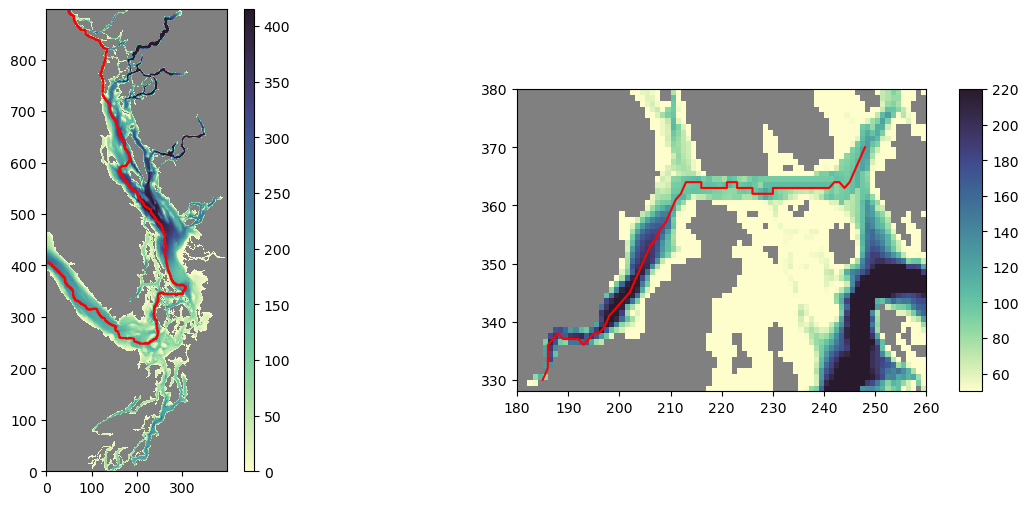

In [ ]:
from mpl_toolkits.axes_grid1 import make_axes_locatable


fig, ax = plt.subplots(1, 2, figsize=(14, 6))
mycmap = cm.deep
mycmap.set_bad('grey')
im = ax[0].pcolormesh(bathyb.variables['Bathymetry'][:], cmap=mycmap, vmin=0, vmax=415)
ax[0].plot(thalweg_pts0[:,1],thalweg_pts0[:,0],color='r')
im2 = ax[1].pcolormesh(bathyb.variables['Bathymetry'][:], cmap=mycmap, vmin=50, vmax=220)
ax[1].plot(thalweg_pts[:,1],thalweg_pts[:,0],color='r')
viz_tools.set_aspect(ax[0]);
viz_tools.set_aspect(ax[1]);
#ax[0].set_xlim([180, 260])
#ax[0].set_ylim([328, 380])
ax[1].set_xlim([180, 260])
ax[1].set_ylim([328, 380])
divider = make_axes_locatable(ax[0])
divider2 = make_axes_locatable(ax[1])
cax = divider.append_axes('right', size='5%', pad=0.05)
cax2 = divider2.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im, cax=cax, orientation='vertical')
fig.colorbar(im2, cax=cax2, orientation='vertical')


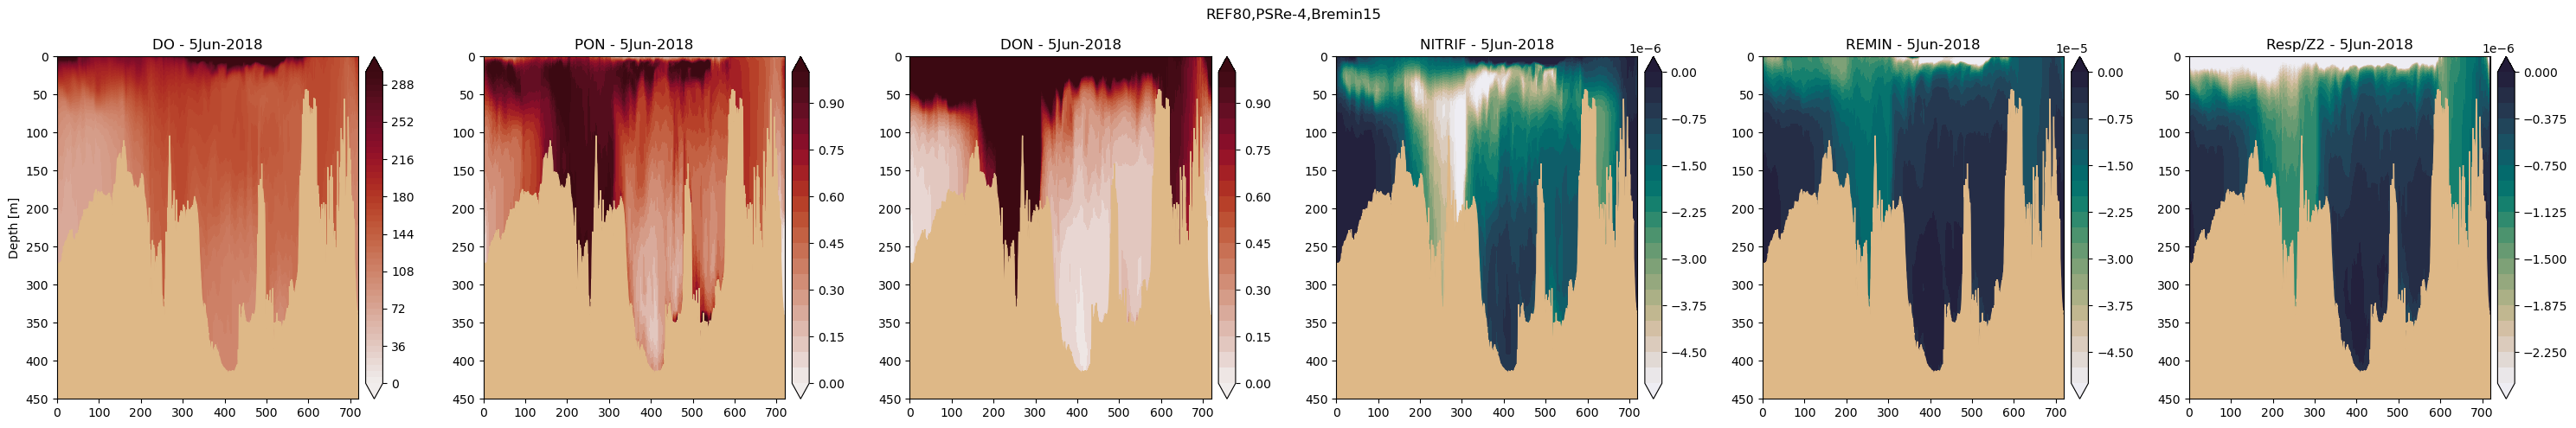

In [14]:
fig, axs = plt.subplots(1, 6, figsize=(30, 5))
cpoxy, cppon, cpdon, cpnit, cprem, cpmes = 0, 1, 2, 3, 4, 5
Month = list(['5Jun-2018','6-Jun-2018'])
t0=154
for month in range(t0, t0+1):
    dep_thal0, distance0, oxy_thal0 = vis.load_thalweg(
                depthb[0, ...], np.array(df_chem.dissolved_oxygen[month-1]), bathyb['nav_lon'][:], bathyb['nav_lat'][:],
                thalweg_pts0)
    dep_thal0, distance0, pon_thal0 = vis.load_thalweg(
                depthb[0, ...], np.array(df_biol.particulate_organic_nitrogen[month-1]), bathyb['nav_lon'][:], bathyb['nav_lat'][:],
                thalweg_pts0)
    dep_thal0, distance0, don_thal0 = vis.load_thalweg(
                depthb[0, ...], np.array(df_biol.dissolved_organic_nitrogen[month-1]), bathyb['nav_lon'][:], bathyb['nav_lat'][:],
                thalweg_pts0)
    dep_thal0, distance0, nit_thal0 = vis.load_thalweg(
                depthb[0, ...], np.array(df_diag.NITR[month-1]), bathyb['nav_lon'][:], bathyb['nav_lat'][:],
                thalweg_pts0)
    dep_thal0, distance0, rem_thal0 = vis.load_thalweg(
                depthb[0, ...], np.array(df_diag.RMIN[month-1]), bathyb['nav_lon'][:], bathyb['nav_lat'][:],
                thalweg_pts0)
    dep_thal0, distance0, mes_thal0 = vis.load_thalweg(
                depthb[0, ...], np.array(df_diag.RMES[month-1]), bathyb['nav_lon'][:], bathyb['nav_lat'][:],
                thalweg_pts0)

    oxy_plot0 = vis._fill_in_bathy(oxy_thal0, meshb, thalweg_pts0)
    pon_plot0 = vis._fill_in_bathy(pon_thal0, meshb, thalweg_pts0)
    don_plot0 = vis._fill_in_bathy(don_thal0, meshb, thalweg_pts0)
    nit_plot0 = vis._fill_in_bathy(nit_thal0, meshb, thalweg_pts0)
    rem_plot0 = vis._fill_in_bathy(rem_thal0, meshb, thalweg_pts0)
    mes_plot0 = vis._fill_in_bathy(mes_thal0, meshb, thalweg_pts0)

    colours_oxy0 = axs[cpoxy].contourf(distance0, dep_thal0, oxy_plot0, np.linspace(0, 300, 51),                                     
                                    cmap=cm.amp, extend='both')
    colours_pon0 = axs[cppon].contourf(distance0, dep_thal0, pon_plot0, np.linspace(0, 1, 21), 
                                     cmap=cm.amp, extend='both')
    colours_don0 = axs[cpdon].contourf(distance0, dep_thal0, don_plot0, np.linspace(0, 1, 21), 
                                     cmap=cm.amp, extend='both')
    colours_nit0 = axs[cpnit].contourf(distance0, dep_thal0, nit_plot0, np.linspace(-0.000005, 0, 21), 
                                     cmap=cm.rain, extend='both')
    colours_rem0 = axs[cprem].contourf(distance0, dep_thal0, rem_plot0, np.linspace(-0.00005, 0, 21), 
                                     cmap=cm.rain, extend='both')
    colours_mes0 = axs[cpmes].contourf(distance0, dep_thal0, mes_plot0, np.linspace(-0.0000025, 0, 21), 
                                     cmap=cm.rain, extend='both')

    vis._add_bathy_patch(
    distance0, bathyb['Bathymetry'][:], thalweg_pts0, axs[cpoxy], color='burlywood')
    vis._add_bathy_patch(
    distance0, bathyb['Bathymetry'][:], thalweg_pts0, axs[cppon], color='burlywood')
    vis._add_bathy_patch(
    distance0, bathyb['Bathymetry'][:], thalweg_pts0, axs[cpdon], color='burlywood')
    vis._add_bathy_patch(
    distance0, bathyb['Bathymetry'][:], thalweg_pts0, axs[cpnit], color='burlywood')
    vis._add_bathy_patch(
    distance0, bathyb['Bathymetry'][:], thalweg_pts0, axs[cprem], color='burlywood')
    vis._add_bathy_patch(
    distance0, bathyb['Bathymetry'][:], thalweg_pts0, axs[cpmes], color='burlywood')

    axs[cpoxy].invert_yaxis()
    axs[cppon].invert_yaxis()
    axs[cpdon].invert_yaxis()
    axs[cpnit].invert_yaxis()
    axs[cprem].invert_yaxis()
    axs[cpmes].invert_yaxis()

    axs[cpoxy].set_ylim(450, 0)
    axs[cppon].set_ylim(450, 0)
    axs[cpdon].set_ylim(450, 0)
    axs[cpnit].set_ylim(450, 0)
    axs[cprem].set_ylim(450, 0)
    axs[cpmes].set_ylim(450, 0)

    axs[cpoxy].set_ylabel('Depth [m]');
 
    axs[cpoxy].set_title(f'DO - {Month[month-t0]}')
    axs[cppon].set_title(f'PON - {Month[month-t0]}')
    axs[cpdon].set_title(f'DON - {Month[month-t0]}')
    axs[cpnit].set_title(f'NITRIF - {Month[month-t0]}')
    axs[cprem].set_title(f'REMIN - {Month[month-t0]}')
    axs[cpmes].set_title(f'Resp/Z2 - {Month[month-t0]}')

    cbar = fig.colorbar(colours_oxy0, ax=axs[cpoxy], pad=0.02)
    cbar = fig.colorbar(colours_pon0, ax=axs[cppon], pad=0.02)
    cbar = fig.colorbar(colours_don0, ax=axs[cpdon], pad=0.02)
    cbar = fig.colorbar(colours_nit0, ax=axs[cpnit], pad=0.02)
    cbar = fig.colorbar(colours_rem0, ax=axs[cprem], pad=0.02)
    cbar = fig.colorbar(colours_mes0, ax=axs[cpmes], pad=0.02)
fig.suptitle('REF80,PSRe-4,Bremin15')

fig.tight_layout(); 